<a href="https://colab.research.google.com/github/kteppris/RealWaste/blob/main/3_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training von Deep Learning Modellen mit PyTorch Lightning

Der nachfolgende Abschnitt widmet sich der **Auswahl der Modelle, der Modell-Entwicklung sowie dem Modell-Tuning**.  

Im diesem Rahmen werden *PyTorch, Torchvision* und *PyTorch Lightning* als Werkzeuge für die Entwicklung und das Training der Modelle verwendet. Diese werden nachfolgend kurz vorgestellt.

**PyTorch** ist ein Open-Source Deep-Learning-Framework, welches aufgrund seiner Einfachheit und Effizienz für dieses Projekt verwendet wird. Es bietet eine intuitive API, die es ermöglicht, komplexe neuronale Netzwerkarchitekturen einfach zu erstellen und zu trainieren. Die Flexibilität von PyTorch ermöglicht es, CNN-Modelle zu entwerfen und an die spezifischen Anforderungen der jeweiligen Aufgabe anzupassen. (The PyTorch Foundation [2024](https://pytorch.org/))


**Torchvision** ist eine auf PyTorch aufbauende Bibliothek, die speziell für Computer-Vision-Anwendungen entwickelt wurde. Sie bietet eine Vielzahl von hilfreichen Funktionen und Werkzeugen, darunter vortrainierte Modelle, Datensatz-Loader und Bildtransformatoren. Torchvision wird in diesem Projekt genutzt, um auf vortrainierte CNN-Modelle wie Inception oder DenseNet zuzugreifen. Diese dienen als Ausgangspunkt für nachfolgende Trainings und ermöglichen es, von bereits gelernten Merkmalen zu profitieren. Hierdurch werden die Trainings- und Rechenzeit für die Müllklassifizierungsaufgabe bemerkenswert verkürzt. So können bereits in wenigen Epochen hohe Klassifizierungsgenauigkeiten erzielt werden. Zusätzlich werden von Torchvision die sogenannten "transforms" verwendet, welche durch Augmentierung der Bilder es ermöglichen, die Bilder in das von dem Modell benötigte Format zu bringen oder die Trainingsdaten künstlich zu erweitern, indem zufällig einzelne Bilder verändert werden. (The PyTorch Foundation [2024](https://pytorch.org/vision/stable/index.html))<br>
Das Konzept von Bildaugmentierung wird in dem dazugehörigen Abschnitt näher erläutert.  


**PyTorch Lightning** ist ein Framework, welches darauf abzielt, die Entwicklung von PyTorch-Modellen zu vereinfachen und zu standardisieren, indem es bewährte Praktiken und Aufbaumuster zur Verfügung stellt. Es bietet eine ressourcenschonende und modulare API, die die effiziente Organisation von Trainings- und Evaluierungsschleifen ermöglicht. Durch die Verwendung von PyTorch Lightning kann der nachfolgende Code strukturiert, wieder verwendbare Komponenten erstellt und das Training der CNN-Modelle skalierbarer und einfacher gemacht werden. (Lightning AI [2024](https://lightning.ai/docs/pytorch/stable/))


Anschließend werden weitere DeepLearning-Modelle auf Basis ausgewählter Backbones mithilfe von Transfer Learning (Thrun et. al. [1998](https://doi.org/10.1007/978-1-4615-5529-2_1)) auf unser Problem angepasst. Single et al. [2023](https://www.mdpi.com/2078-2489/14/12/633) griffen bei dem Training ihrer Modelle auf folgende Backbones zurück: VGG-16, DenseNet121, InceptionV3, InceptionResNetV2 sowie MobileNetV2. Da Single et al. ihren Code nicht veröffentlicht haben, werden zunächst sowohl das stärkste Modell, Inception V3 mit einer Accuracy von 89,19 %, als auch das schwächste Modell, VGG-16 mit einer Accuracy von 85,65 %, trainiert, um die technischen Einstellungen zu überprüfen sowie über Referenzwerte für die nachfolgend trainierten Modelle zu verfügen.  

Da diese Ausarbeitung zeitlichen Limitationen unterliegt, wird unter Rückbezug auf das paper "A Systematic Review of Machine Learning Approaches for Trash Classification" von Vidhya [2023](https://ieeexplore.ieee.org/document/10125688) eine Auswahl der weiterführend zu trainierenden Modelle getroffen. Des Weiteren unterliegt dieses Projekt der Herausforderung einer begrenzten Rechenkapazität. Um diese zu bewältigen, wird sich bei der Auswahl der Backbones auf die in Torchvision vorhandenen Backbones beschränkt. (The PyTorch Foundation [2024](https://pytorch.org/vision/stable/index.html))

Basierend auf den soeben genannten Überlegungen werden zusätzlich zu InceptionV3 und VGG-16 die folgenden Modelle trainiert, um eine umfassende Bewertung der Backbones für die Müllklassifizierungsaufgabe zu ermöglichen.  

**Simple CNN** ist eine Modellarchitektur, welche im Rahmen dieses Projektes erstellt wird. Dabei bezieht sich die Einfachheit (Simple) nicht direkt auf die Modellkomplexität, sondern vielmehr auf die verwendet Methodik. Die Architektur orientiert sich an gängigen Beispielen für einfache Klassifikation mithilfe von Convolutional Neural Networks. (The PyTorch Foundation [2024](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html))(Soni [2021](https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48)). 

**AlexNet** wurde speziell für die Bildklassifizierung entwickelt und setzte sich 2012 in der ImageNet Challenge (ILSVRC) durch, indem es den Top-5-Testfehler bei der Bildklassifizierung auf 15,3 % reduzierte, während der zweite Platz lediglich eine Quote von 26,2 % erreichte (Krizhevsky et al. [2012](https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf), S. 1 ). AlexNet ist somit einer der Pioniere für die Bildklassifizierung. Bekannt für seine leistungsfähige Architektur, verfügt AlexNet über tiefe neuronale Netzwerkschichten, die komplexe Merkmale aus Bildern extrahieren können (Chu et al. [2018](https://downloads.hindawi.com/journals/cin/2018/5060857.pdf?_gl=1*rak2c9*_ga*MTIzMjAxMjczNC4xNzA5MzAxNzc1*_ga_NF5QFMJT5V*MTcwOTMwMzYwNi4yLjEuMTcwOTMwMzg3Ni42MC4wLjA.&_ga=2.1488945.169285418.1709301775-1232012734.1709301775), S. 4 ). Weiterführend wurde AlexNet bereits von Mittal et al. für die Erkennung der Art von Müll auf einem Bild für eine mobile Applikation verwendet und erreichte in diesem Kontext eine Accuracy von 87,69 % (Mittal et al. [2016](https://dl.acm.org/doi/pdf/10.1145/2971648.2971731), S. 942 ).

**DenseNet201** ist ein CNN der DenseNet-Familie mit 201 Schichten, optimiert für Bildklassifizierung. Durch seine dichte Vernetzung, bei der jede Schicht Inputs von allen vorherigen erhält, verbessert es Informationsfluss und Trainingseffizienz und minimiert das Problem verschwindender Gradienten. Es zeichnet sich durch reduzierte Parameter und effiziente Leistung in der Bilderkennung aus. (Huang et al. [2017](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8099726) S. 2261-2266 ) <br>
Weitergehend haben Poudel und Poudyal das vortrainierte DenseNet201 bereits im Kontext der Müllklassifizierung verwendet und konnten mit einer Accuracy von 95 % bei einem Mapping auf zwei Klassen vielversprechende Ergebnisse erzielen (Poudel und Poudyal [2022](https://dl.acm.org/doi/pdf/10.1145/3574318.3574345), S. 32 )

**ResNet50** ist ein tiefes CNN mit 50 Schichten, bekannt für seine "Skip Connections", die das Training erleichtern und das Problem des Verschwindens von Gradienten in tiefen Netzwerken lösen. Es ist leistungsfähig in Bildklassifizierungsaufgaben und zeichnet sich durch Effizienz und hohe Genauigkeit aus. (He et al. [2016](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=7780459), S. 774-776 ) Das ResNet50 wurde unter anderem von Adedeji und Wang in Verbindung mit einer Support Vector Machine bereits zur Müllklassifikation verwendet, welche in diesem Kontext eine Accuracy von 87% erzielen konnten (Adedeji und Wang [2019](https://www.sciencedirect.com/science/article/pii/S2351978919307231?via%3Dihub), S. 607 ).  


**Vision Transformer (ViT)** ist eine Modellarchitektur, welche in den letzten Jahren an großer Beliebtheit gewonnen hat (Khan et al. [2022](https://dl.acm.org/doi/full/10.1145/3505244?casa_token=mlKEI3NW0x8AAAAA%3AdKfFuDTH7uoo2Bb97xnL-MW9KEqNaU_JoYvt8YNVf6M_h337QzxgVLF70Ti2dJPBLKKj43MGMRvz), S. 2-3 ). Die Transformerarchitektur wurde ursprünglich für natürliche Sprachen entwickelt und verwendet das Prinzip der Attention (Achtsamkeit), welcher Zusammenhänge von Wörtern erfasst, indem es für die Zielvariable relevante Teile stärker gewichtet (Vaswani et al. [2017](https://arxiv.org/abs/1706.03762), S. 5 ). Dieses Prinzip wurde auf Bilder übertragen, indem das Bild in Kacheln unterteilt wird und eine Kachel wie ein Wort interpretiert wird (Dosovitskiy et a. [2020](https://arxiv.org/abs/2010.11929)). Es werden zwei Verschiedene Versionen trainiert, **Vision Transformer Large (ViT_L_16)** und **Vision Transformer Large (ViT_B_16)**. Hierbei steht L für Large (groß) und B für Balanced (ausbalanciert), was sich auf die Modellkomplexität bezieht.

Abschließend wird Hyperparametertuning auf das kleinere ViT (**Vision Transformer Large (ViT_B_16)**) angewendet. Im gleichen Zuge werden auch Augmentierung auf die Trainingsdaten angewendet, damit die Menge der Trainingsdaten künstlich erweitert und einem Overfitting entgegengewirkt werden kann (Perez et. al. [2017](https://arxiv.org/abs/1712.04621)).


# Setup und übergreifende Methoden und Klassen

## Datenpfade setzen

- Setup der Pfade

In [1]:
import sys
from pathlib import Path

# Funktion, die prüft, ob dieses Skript in Colab ausgeführt wird
def in_colab():
    # sys beinhaltet alle bereits geladenen Pakete
    return 'google.colab' in sys.modules  # google.colab wird automatisch in Colab vorgeladen, daher Indiz für Colab Environment

code_repo_path = Path("/content/drive/MyDrive/MADS/RealWaste") if in_colab() else Path.cwd()

if in_colab():
    # Google Drive einbinden zum persistieren von Code, Daten und Ergebnissen
    from google.colab import drive
    drive.mount('/content/drive')
    if not code_repo_path.exists():
        raise FileNotFoundError("Code und Datenordner konnte nicht gefunden werden. Bitte zuerst das Notebook '1_Hauptnotebook.ipynb' ausführen.")
    else:
        %cd {code_repo_path}
        print(f"Wechsel Arbeitsverzeichnis zu {Path.cwd()}")
        %pip install -r requirements.txt
else:
    print("Stellen Sie sicher, dass das richtige Venv als Kernel ausgewählt ist,\nwelches wie in '1_Hauptnotebook.ipynb' beschrieben erstellt wurde.")

train_data_path = code_repo_path / "data"
our_test_data_path = code_repo_path / "our_test_data"

Stellen Sie sicher, dass das richtige Venv als Kernel ausgewählt ist,
welches wie in '1_Hauptnotebook.ipynb' beschrieben erstellt wurde.


# Deep Learning

Deep Learning, zu deutsch Tiefes Lernen, ist ein Teilgebiet des maschinellen Lernens. Deep Learning (DL) Modelle lernen aus historischen Daten und sind in der Lage, komplexe Muster in diesen zu erkennen. Im Gegensatz zu den klassischen Methoden aus dem Kapitel der Explorativen Datenanalyse, müssen beim DL vorab keine Features aus den unstrukturierten Bilddaten manuell extrahiert werden. Stattdessen lernen die Modelle automatisch individuell optimierte Filter, um relevante Merkmale aus den Bildern zu extrahieren, anstatt manuell Filter wie den Sobelfilter anzuwenden. Dieser erste Teil eines Deep Learning Modells wird deshalb auch als Feature Extraktion bezeichnet. Im Nachgang findet basierend auf den extrahierten Features eine Klassifikation einer oder mehrerer vollständig verbundenen Schichten statt. Diese Schichten verfügen über Gewichtungen, welche im Laufe des Trainingsprozesses angepasst werden. Die Aufgabe des zweiten Teils ist zu vergleichen Methoden aus Kapitel Zwei, wie Random Forest oder Support Vector Maschinen.

Im Folgenden sollen wesentlichen Komponenten eines Deep Learning Modells kurz erläutert werden:

- **Linear Layer (Lineare Schichten):** Bei linearen Schichten handelt es sich um die zuvor erwähnten voll verbundenen Schichten. In diesen Schichten werden die Eingangsdaten, wie beispielsweise die zuvor extrahierten Features, über lineare Operationen umgewandelt. Dabei werden die Eingangsdaten mit Gewichten multipliziert und ein Bais hinzugerechnet. Der Bais und die Gewichtung werden im Laufe des Trainingsprozesses angepasst, sodass der Unterschied zwischen Vorhersage und tatsächlicher Klasse minimiert wird.
- **Aktivierungsfunktion:** Die Aktivierungsfunktion erhält die Ergebnisse der linearen  Operation als Eingangsdaten und bestimmt op ein Neuron, also eine Verbindung zur nächsten Schicht, aktiviert wird oder nicht. Aktivierungsfunktion sind nicht linear, wodurch das Modell auch komplexere Muster in den Daten erlernen kann.
- **Convolutional Layer (Faltungsschichten):** Faltungsschichten sind Filter, welche auf die Bilddaten anwegendet werden, um beispielsweise Kanten oder Texturen in den Daten zu identifizieren und extrahieren. Die Faltungsschiten wernden ähnliche wie die Gewichtungen der Linearen Schicht im Laufe des Trainingsprozess angepasst, um das Ergebnis der vorhersage zu optimieren.
- **Pooling Layer:** Die Pooling-Schichten reduzieren die größe der Eigangsdaten, indem sie entweder die höchsten Werte (Max-Pooling) oder einen durchschnittlichen Wert der Pixelwerte eines definierten Bereiches berechnen. Dieser Prozess ist vergleichbar mit der Summierung der Pixelwerte nach dem Sobelfilter, welche im Kapitel Explorative Datenanalyse durchgeführt wurde.
- **Loss-Funktion (Verlustfunktion):** Die Verlustfunktion bewerten die Leistung eines Deep Learning Modelles, indem es die Vorhersagen mit der tatsächlichen Beschriftung vergleicht. Das Ergebnis stellt die Grundlage die Rückpropagierung (Backpropagation) des Fehlers dar, bei der die Gradienten der Verlustfunktion bezüglich der Gewichtung berechnet werden. Gradienten sind Vektoren, welche die Richtung und das Ausmaß der Anpassung von Gewichtungen vorgeben.
- **Optimizer:** Der Optimizer ist zuständig für die Anpassung der Gewichtungen innerhalb eines Deep Learning Netzwerkes, mit dem Ziel der Minimierung der Verlustfunktion. Optimizer basieren auf Algorithmen, wie Adam oder Stochastic Gradient Descent (SGD), welche die Anpassung der Gewichtungen anhand der Ableitung der Verlustfunktion berechnen. Sie haben das Ziel das globale Minimum, die Kombination von Gewichtung bei denen die Verlustfunktion am niedrigsten ist, zu erreichen. Es kann auch vorkommen, dass ein Optimizer in einem lokalen Minimum verbleibt, da weitere Anpassungen der Gewichtung eine Verschlechterung der Verlustfunktion hervorrufen kann.
    - **Learning-Rate (Lernrate):** Die Lernrate entscheidet die stärke der Anpassung der Gewichtungen des Optimizers und ist ein wichtiger Hyperparameter beim Training von Deep Learning Modellen. Eine zu klein gewählte Learning-Rate kann häufiger dazu führen, dass der Optimizer in einem lokalen Minimum verbleibt. Bei einer zu großen Schrittgröße kann es jedoch sein, dass das Modell das globale Minimum überspringt. Die Lernrate muss individuell für die jeweilige Problemstellung ausgewählt werden.
- **Scheduler:** Damit sich ein Modell zu beginn des Trainings möglichst schnell dem globalen Minimum annähert, aber dieses dann nicht überspringt, kann ein Scheduler verwendet werden. Ein Scheduler reduziert die Lernrate nach einem vorgegebenen Regelwerk automatisch, sodass der Optimizer zum Ende eines Trainingsprozess möglichst dicht an das globale Optimum herankommt.


## Trainingsprozess

Der Trainingsprozess von Deep Learning Modellen ist unabhängig von der Modellarchitektur. Die Daten sind größtenteils gleich aufgebaut. Wie im vorherigen Abschnitt beschrieben, bedarf es für das Training einen iterativen Prozesses, welcher typischerweise aus folgenden, allgemeinen Schritten besteht:
1. **Loading:** Bereitstellung einer Teilmenge (Batch) des Datensatzes im korrekten Format.
2. **Prediction:** Vorhersage der Zielvariable y durch das Modell.
3. **Evaluation:** Berechnung der Loss basierend auf der Vorhersage und des tatsächlichen Wertes.
4. **Backpropagation:** Berechnung der Gradienten der Verlustfunktion hinsichtlich der Gewichtungen.
5. **Optimizer-Step:** Aktualisierung der Gewichte entsprechend den berechneten Gradienten.

Dieser Prozess des Ladens und Verarbeitens einer Batch in der Trainingsschleife wird auch als Step (Schritt) bezeichnet. Er wird laufend wiederholt, wobei eine komplette Iteration des Datensatzes als eine Epoch (Epoche) bezeichnet wird. 

Hinzu kommen zwei weiteren optionale Schleifen, die Validierungsschleife und die Testschleife. Bei diesen werden die Anpassung der Gewichte ausgelassen und stattdessen wird das Modell auf ihm unbekannte Daten angewendet, um zu überprüfen, wie gut das Modell Vorhersagen auf diesen Daten tätigt. Die Validierung findet häufig nach jeder Epoche statt und der Test, nachdem das Training beendet wurde. Beide dienen der Einschätzung, ob ein Modell sich weiter der tatsächlichen Zielfunktion f annähern lässt oder sich zu stark den Trainingsdaten anpasst. Passt das Modell sich zu stark an die Trainingsdaten an, wird dies als Overfitting (Überanpassung) bezeichnet. Dabei lernt das Modell die Daten auswendig, anstatt die zugrundenliegenden Muster zu erkennen. Dadurch sinkt die Fähigkeit das Modells gute Vorhersagen bei neuen, unbekannten Daten zu tätigen. Deshalb werden Validierungsmetriken wie das Ergebnis der Validierungs-Loss als Grundlage für den frühzeitigen Abbruch eines Trainingsprozesses verwendet. Ein Anstieg der Validierungs-Loss bei einer weiter sinkenden Trainings-Loss ist ein typische Anzeichen für Overfitting. Damit ein Overfitting verhindert werden kann, werden die Metriken des Trainings und der Validierung während des Prozesses konstant geloggt und überwacht.

# PyTorch Lightning


## Konfigurierbare Datamodule Klasse

Für dieses Projekt soll eine Vielzahl verschiedener Modellarchitekturen verglichen werden. Für einen Vergleich ist es notwendig, dass alle Modelle mit denselben Rahmenbedingungen trainiert werden. Um dies zu erreichen, wird eine Basis-Klasse `ConfigurableDataModule`, die von PyTorch Lightning Klasse `LightningDataModule` erbt, vordefiniert. Mithilfe der `ImageFolder` Klasse von torchvision, werden die Namen der Unterordner das Datensatzes automatisch als Labels verwendet und die Daten in einem PyTorch Dataset Klasse geladen. Diese bekommen als Argument die `transforms`, welche bei PyTorch für Augmentierungs-Piplines verwendet werden. Die `transforms` stellen demnach eine Kette von Transformierung, die on-the-fly auf die Eingangsdaten angewendet werden. Diese ist eine iterierbare Klasse, welche jeweils ein Tensorpaar bestehend aus Bild und Label bereitstellt. Die Klasse kann mit unterschiedlichen Stages (Phasen) eingerichtet werden:

1. `fit`: Die Phase Fit steht für den Trainings- und Validierungsprozess. In dieser Phase wird der RealWaste Trainingsdatensatz geladen und in Trainings- und Validierungsdatensatz aufgeteilt. Dabei werden 20% der Daten als Validierungsdatensatz verwendet, wobei dieser die gleiche Verteilung der Klassen aufweist wie der Originaldatensatz. Vorab wird ein Seed gesetzt, welcher gewährleistet, dass bei jeder initialisierung dieser Klasse die gleichen Bilder ausgewählt werden. Dies ist notwendig, damit die Ergebnisse der verschiedenen Modelle vergleichbar sind.
2. `test`: Bei der Phase Test werden die im Rahmen dieses Projektes aufgenommen Testbilder geladen.

PyTorch Lightning erfordert, dass bei der dem LightningDataModule für jede der gewünschten Schleifen (Train/Val/Test) eine Funktion definiert wird, welche den Datenloader zurück gibt. Der Dataloader ist eine PyTorch Klassen, welche das effiziente Laden der Daten übernimmt. Sie verwendet im Hintergrund Multiprocessing, um die zur verfügung stehenden CPU-Kerne möglichst effizient auszunutzen.

## Lightning Module

In [2]:
from pytorch_lightning import LightningDataModule
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader, Subset
import torch
import os
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

class ConfigurableDataModule(LightningDataModule):
    def __init__(
            self, 
            train_data_dir: str, 
            test_data_dir: str, 
            batch_size: int, 
            train_transform: transforms.Compose, 
            val_test_transform: transforms.Compose, 
            workers=-1, 
            seed=42
        ):
        super().__init__()
        self.workers = os.cpu_count() if workers == -1 else workers
        self.train_data_dir = train_data_dir  # Daten von RealWaste Datensatz
        self.test_data_dir = test_data_dir  # Unsere Testdaten
        self.batch_size = batch_size
        self.train_transform = train_transform  # Training Transformation, die auch Rotate etc. beinhalten
        self.val_test_transform = val_test_transform  # Val/Test Transformation die normalerweise nur to tensor, normalisierung etc. beinhalten
        self.seed = seed # Seed zum gewährleisten von gleichen Splits des Trainingsdatensatzes

    def setup(self, stage=None):
        # Seed setzen für konsistente Ergebnisse beim splitten der Daten
        torch.manual_seed(self.seed)
        np.random.seed(self.seed)

        # Setup des Trainings und Validierungsdatensates
        if stage in (None, "fit"):
            # Laden des Training Datensatzes mit den zugehörigen Transformierungen
            full_train_dataset = ImageFolder(root=self.train_data_dir, transform=self.train_transform)

            # Ermitteln der Indizes für Train/Val Split nach gleichen Verfahren wie bei den klassischen ML Methoden
            train_indices, val_indices = self.stratified_split(full_train_dataset)

            # Train Datensatz setzen basierend auf den bestimmten Indizes
            self.train_dataset = Subset(full_train_dataset, train_indices)

            # Validation Datensatz Laden wie zuvor der Trainingsdatensatz, aber mit anderen Transformierungen
            # Dies ermöglicht es, beispielsweise Rotate nur auf die Trainingsdaten anzuwenden, aber normalisierung auf beide
            full_val_dataset = ImageFolder(root=self.train_data_dir, transform=self.val_test_transform)
            # Setzen des Validierungsdatensatzes basierend auf den Indizes
            self.val_dataset = Subset(full_val_dataset, val_indices)

        # Setup unseres Testdatensates
        if stage == "test":
            # Nutzung der Val/Test Transfomierungen
            self.test_dataset = ImageFolder(root=self.test_data_dir, transform=self.val_test_transform)

    def stratified_split(self, dataset):
        # Ermittelt Indizes für Train/Test split mit gleicher Verteilung der Klassen und festgesetzten seed
        targets = np.array([sample[1] for sample in dataset.samples])

        X_dummy = np.zeros(len(targets))
        # 20% Validation, 80% Train
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=self.seed)

        for train_index, val_index in sss.split(X_dummy, targets):
            return train_index, val_index

    def train_dataloader(self) -> DataLoader:
        return DataLoader(self.train_dataset, batch_size=self.batch_size, shuffle=True, num_workers=self.workers)

    def val_dataloader(self) -> DataLoader:
        return DataLoader(self.val_dataset, batch_size=self.batch_size, num_workers=self.workers)

    def test_dataloader(self) -> DataLoader:
        return DataLoader(self.test_dataset, batch_size=self.batch_size, num_workers=self.workers)

## Lightning DataModule

Im vorherigen Abschnitt wurde dargestellt, dass Deep Learning Prozesses häufig gleich aufgebaut sind. Aufgrunddessen wurde für PyTorch eine weitere Abstraktionsschicht entwickelt, welche viele wiederkehrende Teile des Prozesses wegabstrahieren. Alle der zuvor beschriebenen Schritte sind bereits vorimplementiert und können bei Bedarf einzelnd angepasst werden. Damit die zusätzliche Abstraktionsschicht nicht die Flexibilität einschränkt, wurden zwei wesentliche Komponenten in PyTorch lightning implementiert:

1. **Hooks:** Bei den Hooks in der LightningModule Klassen handelt es sich um Methoden, welche an bestimmten Punkten der Trainings-, Validierungs, oder Testschleife aufgerufen werden. Bei der implementierung eines neuen PyTorch Lightning Modules können auf diese Weise einzelne benutzerdefinierten Aktionen in den vordefinierten Prozess eingebunden werden. Ein Beispiel für ein häufig angepassten hook wäre die Methode `on_epoch_end`, welche beispielsweise verwendet werden kann um den Durchschnitt der Metriken über alle Steps einer Epoche zu berechnenen und sie zu loggen. Zusätzlich zu den optionalen Hooks, welche bereits vordefiniert sind, gibt es auch Hooks welche seblst implementiert werden müssen. Dazu gehört beispieslweise der `trainings_step`, welcher die zuvor beschriebenen Schritte der Prediction und Evaluation in der Trainingsschleife übernimmt. Diese Schritte unterscheiden sich je nach Ausgabeformat der Modelle häufig, sodass sie grundsätzlich selbst definiert werden müssen.
2. **Callbacks:** Bei Callbacks handelt es sich um eigenständige Objekte, welche mit in den Trainingsprozess eingegeben werden und an einer bestimmten stelle im Prozess aufgerufen werden. Sie ermöglichen es Logik in den Prozess zu indizieren, ohne den Trainingprozess selbst anzupassen. Sie sind typischerweise so ausgelegt, dass sie möglichst unabhängig von den Anpassungen der Hooks funktionieren. Typische Beispiele sind `ModelCheckpoint`, welches automatisch die besten Modell-Zwischenstände abspeichert, oder `EarlyStopping`, welches nach einen vorgegebenen Regelwerk das vorzeitig beendet Training abbricht.

### BaseWasteClassifier

In diesem Projekt wird eine Basis Klases definiert, welche die Grundlage für alle folgenden konkrenten Modellklasen darstellen soll. Sie definiert alle Trainings- Validierungs- und Testschleifen bezogenen Funktionalitäten vor, welche unabhängig vom Backbone vordefiniert werden können. Diese sollen im Folgenden kurz erläutert werden:
- **Output-Pfade:** Es werden Pfade vorbereitet, unter welchen folgende Outputs abgespeichert werden:
    - /models: Checkpoints in Form von Gewichtungen der aktuell besten Epoche
    - /images: Beschriftete Bilder aus dem Validierungsprozess
    - /logs: CSV Dateien der Metriken, sowie der Validierungs-Confusionsmatrix
- **Metriken:** Alle genutzten Metriken wurden Macro gewichtet, was bedeutet, dass die Berechnung der Metriken für jede Klassen seperat erfolgt und dann der Mittelwert aller Klassen berechnet wird. Dies hat den Vorteil, dass die Klassen unabhängig von ihrer Anzahl der Bilder gleich gewichtet werden und somit das Ergebnis ein ausgewogenes Maß der Gesamtleistung der Modells über alle Klassen darstellt.
    - Accuracy (Genauigkeit): Anteil der insgesammt korrekt Vorhergesagten Klassen.
    - Precision (Präzision): Anteil der korrekt vorhergesagten Klassen im Verhältnis zu der Gesamtzahl.
    - Recall (Sensitivität): Anteil der korrekt vorhergesagten Klassen im Verhältnis zu den tatsächlich positiven Klassen.
    - F1 Score (F1-Wert): Harmonisches Mittel aus Precision und Recall, was besonders Aufgrund der teilweise ungleichen Anzahl von Bildern je Klasse von relevanz ist.
- **Loss-Funktion:**
    - Cross Entropy: Die Cross Entropy ist einen Loss-Funktion für die Klassifikation, die den Abstand der Wahrscheinlichkeit einer Klasse zu dem tatsächlichen Wert misst. Dadurch wird bewirkt, dass Unsicherheit bei Vorhersagen minimiert wird, indem falsche Vorhersagen mit hoher Wahrscheinlichkeit höher bestraft werden.
- **Logging:** Die Klasse macht gebrauch der in PyTorch lightning vordefinierten Logging-Funktion. Diese leitet die geloggten Metriken automatisch weiter an die später hinzugefügten Logger.

- **Step:** Für die einzelnen Phasen werden Step-Abläufe definiert. Dies binhaltet die Berechnung der Loss, das umwandeln der Logits zu einer konkreten Vorhersage und der Weitergabe der Daten zum Logging. Dies wird für alle Phasen individuell definiert.
- **Optimizer:** Für dieses Projekt wird ein Stochastic Gradient Descent (SGD) mit Momentum verwendet. Dabei handelt es sich um einen bewährten Algorithmus, welcher sich bereits bei einer vielzahl von Problemstellung bewährt hat. Ein Momentum von 0.9 hilft zusätzlich lokalen Minima zu überwinden und hilft dabei stabile und schneller Fortschritte beim Training zu erreichen. Besonders aufgrund der Bedingung viele Modelle mit begrenzten Ressourcen zu trainieren, wird diese Einstellung gewählt.
    - Learning-Rate: Für dieses Projekt wird für alle Trainings vor dem Hyperparameter Tuning eine Learning-Rate von 0.001 gewählt. Dies ist größer als die von Single et al. welche bei 0.00001 und weniger liegt (vgl. Single et al. [2023](https://www.mdpi.com/2078-2489/14/12/633), S. 7). Aufgrund der berenzten Zeit hat die Erhöhung der Learning-Rate den Vorteil die Trainingszeit zu reduzieren, wobei sie weiterehin gering genug gehalt werden muss, damit das globale Minimum erreicht werden kann.
    - Scheduler: Nach 10 Epochen (step_size) wird die Learning-Rate um einen Faktor von 0.1 (gamma) reduziert. Diese Bedigung wird jede Epoch einmal überprüft (frequency). Hierdurch wird sichergestellt, dass bei längerem Training Schrittweise die Learning-Rate reduziert wird und auf diese Weise ein mögliches Überspringen das globalen Minimums vermieden werden kann.

In [3]:
import pytorch_lightning as pl
import torch
import torchmetrics
import time
from pathlib import Path

class BaseWasteClassifier(pl.LightningModule):
    CLASS_NAMES = ['Cardboard', 'Food Organics', 'Glass', 'Metal', 'Miscellaneous Trash', 'Paper', 'Plastic', 'Textile Trash', 'Vegetation']

    def __init__(self, num_classes: int, results_dir="results", learning_rate=0.001):
        super().__init__()
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        # Klassennamen bekommen, für den result Ordner namen
        model_class_name = self.__class__.__name__
        
        # Ergebnisspfade definieren
        self.results_dir = Path(results_dir) / model_class_name
        self.models_dir = self.results_dir / "models"
        self.images_dir = self.results_dir / "images" 
        self.logs_dir = self.results_dir / "logs"
        self.version = None # Wird für jeden neuen run neu gesetzt

        # Pfade erstellen
        self.results_dir.mkdir(parents=True, exist_ok=True)
        self.models_dir.mkdir(parents=True, exist_ok=True)
        self.images_dir.mkdir(parents=True, exist_ok=True)
        self.logs_dir.mkdir(parents=True, exist_ok=True)

        # Platzhalter wo später das tatsächliche PyTorch Modell hinkommt
        # Wird bei konkreten Klassen definiert
        self.model = None
        
        # Metrik tracker initialisieren
        # Nutzung von macro average zum beachten der ungleichen Anzahl von Fotos in den Klassen
        self.accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=num_classes, average='macro')
        self.precision = torchmetrics.Precision(task='multiclass', num_classes=num_classes, average='macro')
        self.recall = torchmetrics.Recall(task='multiclass', num_classes=num_classes, average='macro')
        self.f1_score = torchmetrics.F1Score(task='multiclass', num_classes=num_classes, average='macro')


    def forward(self, x):
        # Diese Method ist quasi "abstract" und muss von der jeweiligen konkreten Klasse definiert werden
        raise NotImplementedError("Diese Methode muss von der konkreten Klasse implementiert werden.")
        
    def training_step(self, batch, batch_idx) -> torch.Tensor:
        x, targets = batch
        outputs = self(x)
        logits = outputs if isinstance(outputs, torch.Tensor) else outputs[0]  
        loss = torch.nn.functional.cross_entropy(logits, targets)
        
        preds = torch.argmax(logits, dim=1)
        
        # Logging
        phase = 'train'
        self.log(f'{phase}_loss', loss, on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log_metrics(preds, targets, phase, on_step=True)
        return loss

    def validation_step(self, batch, batch_idx) -> dict[torch.Tensor]:
        x, targets = batch

        start_time = time.perf_counter()
        outputs = self(x)
        inference_time = time.perf_counter() - start_time
        
        # Durchschnittliche Inferenzzeit pro Bild Berechnen und loggen
        avg_inference_time_per_image = inference_time / len(x)
        self.log('val_avg_inference_time_per_image', avg_inference_time_per_image)
        
        logits = outputs if isinstance(outputs, torch.Tensor) else outputs[0]
        loss = torch.nn.functional.cross_entropy(logits, targets)
        
        # Logging
        phase = 'val'
        self.log(f'{phase}_loss', loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        # Die Eigenlichte Vorhersage aus den logits ermittelt (höchste Wahrscheinlichkeitswert)
        preds = torch.argmax(outputs, dim=1)
        self.log_metrics(preds, targets, phase, on_step=False)
        
        # loss MUSS returned werden, den rest geben wir mit damit unsere EnhancedSaveCallback Callback darauf zugreifen kann
        return  {'loss': loss, 'img': x, 'preds': preds, 'targets': targets}
    
    def test_step(self, batch, batch_idx):
        x, targets = batch

        start_time = time.perf_counter()
        outputs = self(x)
        inference_time = time.perf_counter() - start_time
        
        # Durchschnittliche Inferenzzeit pro Bild Berechnen und loggen
        avg_inference_time_per_image = inference_time / len(x)
        self.log('test_avg_inference_time_per_image', avg_inference_time_per_image)
        
        logits = outputs if isinstance(outputs, torch.Tensor) else outputs[0]
        loss = torch.nn.functional.cross_entropy(logits, targets)
        
        # Logging
        phase = 'our_test_data'
        self.log(f'{phase}_loss', loss, on_step=False, on_epoch=True, prog_bar=True, logger=True)
        # Die Eigenlichte Vorhersage aus den logits ermittelt (höchster Wahrscheinlichkeitswert)
        preds = torch.argmax(outputs, dim=1)
        self.log_metrics(preds, targets, phase, on_step=False)
        
        # loss MUSS returned werden, den rest geben wir mit damit unsere EnhancedSaveCallback Callback darauf zugreifen kann
        return {'loss': loss, 'img': x, 'preds': preds, 'targets': targets}

    def log_metrics(self, preds, targets, phase, on_step=True, on_epoch=True):
        self.log(f'{phase}_acc', self.accuracy(preds, targets), on_step=on_step, on_epoch=on_epoch, prog_bar=True, logger=True)
        self.log(f'{phase}_precision', self.precision(preds, targets), on_step=on_step, on_epoch=on_epoch, prog_bar=False, logger=True)
        self.log(f'{phase}_recall', self.recall(preds, targets), on_step=on_step, on_epoch=on_epoch, prog_bar=False, logger=True)
        self.log(f'{phase}_f1', self.f1_score(preds, targets), on_step=on_step, on_epoch=on_epoch, prog_bar=True, logger=True)
    
    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate, momentum=0.9)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
        # Scheduler Einstellungen
        scheduler_config = {
            "scheduler": scheduler,
            "interval": "epoch",  # Wann der Scheduler geupdatet wird
            "frequency": 1,       # Wie oft er geupdated wird (hier jede Epoche)
        }
        return {"optimizer": optimizer, "lr_scheduler": scheduler_config}



## PyTorch Lightning Callbacks

Für eine bessere Vergleichbarkeit der Ergebnisse, wird im Rahmen dieses Projektes einen eigene Callback Klasse definiert, welche das speichern der Daten in den gewünschten Datenformaten vornimmt. Die Klasse sammelt über die Validation und Test Phasen bei jedem Step die Output der Daten. Die `on_validation_batch_end` und `on_test_batch_end` beziehen sich auf die PyTorch Lightning Hooks und werden automatisch nach den jeweiligen `validation_step` oder `test_step` asugeführt. Die Funktion erhalten dabei als Argumente das Dictionary, welches in den Step-Funktion returned wird. Auf diese Weise erhält die Callback Klasse die Eingangsdaten und Ergebnisse aus dem Trainingsprozess. Hierbei ist zu beachten, dass die Daten von dem GPU VRAM auf den Arbeitsspeicher verschoben werden müssen, damit der VRAM nach jedem Step wieder frei wird und ein `CUDA Out of Memory` vermieden wird. Gleiches gilt bei der Verwendung anderer Accalerator, wie beispielsweise Apple Silicon, welche auf Metal Performance Shaders (MPS) zurückgreifen (Apple, [2024](https://daeveloper.apple.com/metal/)).

Am Ende einer Validierungsepoch oder mit beendigung der Testschleife, werden die gesammelte Ergebnisse umgewandelt. Dabei werden die gesammelten Vorhersagen und die zugehörigen tatsächlichen Label genutzt um einen Confusionsmatrix zu erstellen und diese als CSV Datei abzuspeichern. Bei dem gesammelten Tensoren der Bilder wird vorerst die Normalisierung rückgängig gemacht und sie werden zu Bilder Arrays transformiert. Diese werden dann jeweils mit ihre Vorhersage und der tatsächlichen Klasse beschriftet und anschließend abgespeichert. Bei der Validierung werden nur die Bilder das aktuell besten Modelles, standardmäßig gemessen an der Validation Accuracy, abgespeichert. Damit nicht die kompletten Validierungsdaten für jedes Modell gespeichert werden, werden nur 10% der Bilder zufällig ausgewählt.

Die Speicherung der Bilder und Konfusionsmatrizen erfolgt über vordefinerte Pfade. Dabei erhält jedes Trainierte Modell einen eigenen Ordner unter dem relativen Pfad `/results`. Diese enhalten jeweils einen Ordner `/images`, `/logs` und `/models`.
In jedem dieser Ordner befinden sich weitere Unterordner für jede verschiedene Version, die von einer Modellarchitektur trainiert wurde. Zusätzlich werden die Bilder und Konfusionsmatrizen in Unterordner `/val` und `/test` einsortiert.

In [4]:
from pathlib import Path
import numpy as np
import pandas as pd
import torch
import shutil
from collections import defaultdict
import random
from sklearn.metrics import confusion_matrix
from PIL import ImageDraw
from torchvision.transforms.functional import to_pil_image
from pytorch_lightning.callbacks import Callback

class EnhancedSaveCallback(Callback):
    def __init__(
        self,
        monitor='val_acc',
        mode='max',
        save_image_pct=0.1,
        image_norm_mean=[0.485, 0.456, 0.406], # Falls bei Modellen andere Normalisierungsparameter verwendet werden
        image_norm_std=[0.229, 0.224, 0.225]
    ):
        super().__init__()
        self.monitor = monitor
        self.mode = mode
        self.best_metric = -np.inf if mode == 'max' else np.inf
        self.save_image_pct = save_image_pct
        self.mean = image_norm_mean
        self.std = image_norm_std
        self.logs_dir = None
        self.images_dir = None
        self.step_outputs = []
        self.best_model_images = []
        self.best_model_cm_df = pd.DataFrame()

    def on_fit_start(self, trainer, pl_module):
        # Pfade direkt zum beginn des ganzen Prozesses besorgen 25.06
        self.logs_dir = pl_module.logs_dir
        self.images_dir = pl_module.images_dir
        self.class_names = pl_module.CLASS_NAMES
        self.version = pl_module.version

    def on_validation_batch_end(self, trainer, pl_module, outputs, batch, batch_idx, dataloader_idx=0):
        outputs = self.outputs_to_cpu(outputs)
        self.step_outputs.append(outputs)

    def on_validation_end(self, trainer, pl_module):
        # Erfassen der Ergebnisse der letzten Validation Epoche (aller Val Steps dieser Epoche)
        current_metric = trainer.callback_metrics.get(self.monitor)
        if current_metric and any(self.step_outputs):
            is_best = (current_metric > self.best_metric if self.mode == 'max' else current_metric < self.best_metric)
            if is_best:
                self.best_metric = current_metric
                # Update best model data
                self.set_confusion_matrix_df()
                self.set_images_with_labels()
        # Leeren für nächste Epoche
        self.step_outputs.clear()

    def on_fit_end(self, trainer, pl_module):
        if self.best_model_images and not self.best_model_cm_df.empty:
            self.save_labeled_images('val')
            self.save_confusion_matrix('val')
            # Löschen, Falls diese Instanz der Callback nochmal benutzt wird
            self.cleanup()

    def on_test_batch_end(self, trainer, pl_module, outputs, batch, batch_idx, dataloader_idx=0):
        outputs = self.outputs_to_cpu(outputs)
        self.step_outputs.append(outputs)

    def on_test_end(self, trainer, pl_module):
        # Speichern der Ergebnisse des Testes
        if any(self.step_outputs):
            self.set_confusion_matrix_df()
            self.set_images_with_labels()
            self.save_labeled_images('test')
            self.save_confusion_matrix('test')
            self.cleanup()

    def outputs_to_cpu(self, outputs):
        # outputs = {'loss': loss, 'img': x, 'preds': preds, 'targets': y} alle cuda:0
        # Sicherstellen, dass alle Tensoren auf die CPU verschoben werden
        # Das sorgt dafür das wir keine Variablen halten, die den VRAM voll laufen lassen
        return {k: v.cpu() if torch.is_tensor(v) else v for k, v in outputs.items()}

    def set_confusion_matrix_df(self):
        targets = torch.cat([o['targets'] for o in self.step_outputs])
        predictions = torch.cat([o['preds'] for o in self.step_outputs])
        cm = confusion_matrix(targets.numpy(), predictions.numpy())
        self.best_model_cm_df = pd.DataFrame(cm, index=self.class_names, columns=self.class_names)

    def set_images_with_labels(self):
        images = torch.cat([o['img'] for o in self.step_outputs])
        labels = torch.cat([o['targets'] for o in self.step_outputs])
        predictions = torch.cat([o['preds'] for o in self.step_outputs])
        # Use a default dict to avoid checking if a key exists
        image_dict = defaultdict(lambda: defaultdict(list))

        for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
            # Determine TP, FP, TN, FN
            if label == prediction:
                result_label = "TP" if label.item() == 1 else "TN"
            else:
                result_label = "FP" if prediction.item() == 1 else "FN"

            # Here, instead of processing the image, we just store the raw tensor and its metadata
            actual_class_name = self.class_names[label.item()]
            # Append a tuple of the raw image tensor, label, and prediction for later processing
            image_dict[actual_class_name][result_label].append((image, label, prediction, idx))

        self.best_model_images = image_dict


    def process_and_annotate_image(self, image_tensor, label, prediction):
        # Unnormalize and convert to PIL
        image = self.unnormalize(image_tensor)
        pil_img = to_pil_image(image)
        draw = ImageDraw.Draw(pil_img)
        # Annotation text
        actual_class_name = self.class_names[label.item()]
        predicted_class_name = self.class_names[prediction.item()]
        annotation_text = f'Actual: {actual_class_name},\nPredicted: {predicted_class_name}'
        # Drawing text on the image
        draw.text((10, 10), annotation_text, fill="white")
        return pil_img

    def save_labeled_images(self, phase):
        for class_name, result_dict in self.best_model_images.items():
            for result_label, images in result_dict.items():
                # Determine number of images to save
                num_to_save = max(1, int(len(images) * self.save_image_pct))
                # Select images based on the phase
                selected_images = random.sample(images, num_to_save) if phase == 'val' else images

                for image_tensor, label, prediction, idx in selected_images:
                    # Process and annotate the image here
                    pil_img = self.process_and_annotate_image(image_tensor, label, prediction)
                    # Save the image
                    img_path = Path(self.images_dir) / self.version / phase / class_name / f"{result_label}_image_{idx}.png"
                    img_path.parent.mkdir(parents=True, exist_ok=True)
                    pil_img.save(img_path)

    def save_confusion_matrix(self, phase):
        # Erstelle subordner mit "val" oder "test"
        cm_path = self.logs_dir / self.version / phase
        cm_path.mkdir(parents=True, exist_ok=True)
        cm_file_path = cm_path / 'confusion_matrix.csv'
        # Schreibe Konfusionsmetric
        self.best_model_cm_df.to_csv(cm_file_path)

    def unnormalize(self, image):
        image = image.clone()
        for t, m, s in zip(image, self.mean, self.std):
            t.mul_(s).add_(m)
        return image

    def cleanup(self):
        self.best_metric = -np.inf if self.mode == 'max' else np.inf
        self.best_model_images.clear()
        self.best_model_cm_df = pd.DataFrame()

Zusätzlich zu der eigens für dieses Projekt definierten Callback werden noch zwei weitere standard Callbacks mit in das Training eingegeben:
- **ModelCheckpoint:** Speichert den Checkpoint der besten Epoche, gemessen an der Validierungs-Loss unter `<model_name>/models`.
- **EarlyStopping:** Beendet das Training nachdem die Validierungs-Loss sich über zwei Epochen nicht weiter verbessert hat.

Die Kombination dieser beiden Callbacks stellt sicher, dass das Training frühzeitig abgebrochen wird, wenn es keine Fortschritte in der Validierung verzeichnen kann. Gleichzeitig wird sichergestellt, dass der gespeicherte Modell-Checkpoint nicht aus der letzten Epoche stammt, sondern aus der, der das beste Validierungsloss aufweist. Dies ist besonders relevant, damit beim Aufruf des Tests im Nachgang nicht die Gewichtung der letzten Epoche verwendet werden, sondern die des besten Modell-Checkpoints.

In [5]:
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks import EarlyStopping

def get_callbacks(model_checkpoint_path: str, early_stop_patience=2):
    callbacks = []

    # M
    checkpoint_callback = ModelCheckpoint(
        dirpath=model_checkpoint_path,
        filename='{epoch}-{val_loss:.2f}',
        save_top_k=1,  # Nur das beste Modell speichern
        verbose=True,
        monitor='val_loss',  # Metrik die beobachtet werden soll
        mode='min', # Niedrigere loss ist besser
    )
    callbacks.append(checkpoint_callback)

    # Stoppt des Training wenn sich val loss nicht verbessert
    early_stopping_callback = EarlyStopping(
        monitor="val_loss",  # Loss beobachten um Overfitting zu vermeiden
        mode="min",  # Loss soll minimiert werden
        patience=early_stop_patience,  # "Wartet" n Epochen ohne Verbesserung
    )
    callbacks.append(early_stopping_callback)
    callbacks.append(EnhancedSaveCallback(monitor='val_acc', mode='max', save_image_pct=0.1))
    return callbacks

## Train Modell Funktion

Zur weiteren Abstraktion des Prozesses wird eine Funktion `train_model` definiert, welche die zuvor definierten Komponenten initialisiert und den Trainings-, Validierungs- und Testprozess startet. Zusätzlich werden in dieser Funktion auch zwei Logger initialisiert und dem Trainer übergeben. Der Tensorboard Logger dient dem Monitoring der Metriken während des Trainingsprozesses, während der CSV Logger die Ergebnisse in einer CSV abspeichert, sodass sie anschließend einfacher ausgewertet werden können. Jeder Trainingslauf speichert Ergebnisse unter dem Namen der jeweiligen konkreten Modell Klassen. Bei einem erneuten Training der gleichen Klasse wird automatisch ein neuer Versionsordner erstellt mit den neuen Ergebnissen. Wird der Versionsname statisch vorgegeben, so wird vorab sichergestellt, dass alle bereits abgespeicherten Ergebnisse dieser Version gelöscht werden, damit keine Fehler entstehen.

In [6]:
import os
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import TensorBoardLogger, CSVLogger


def clear_old_version_results(result_dir, version):
    # Wenn zwei mal das gleichen Modelle mit einem statisch angegebenen Version Namen trainiert wird,
    # kommt es zu Errors, weshalb die Ordner vorab gelöscht werden müssen
    # Löschen der alten Bilder
    old_images_path = result_dir / "images" / version
    if old_images_path.exists():
        print("Es wurde bereits ein Bilderordner für diese Version gefunden.")
        print(f"Lösche: {old_images_path}")
        shutil.rmtree(old_images_path)
    # Löschen der alten Logs
    old_logs_path = result_dir / "logs" / version
    if old_logs_path.exists():
        print("Es wurde bereits ein Logsordner für diese Version gefunden.")
        print(f"Lösche: {old_logs_path}")
        shutil.rmtree(old_logs_path)

def train_model(model, data_module, tb_log_dir="tb_logs", max_epochs=50, logger_name="model_logs", version_name=None, callbacks=[]):
    # Logger definieren
    tb_logger = TensorBoardLogger(tb_log_dir, name=logger_name)
    csv_logger = CSVLogger(model.results_dir, name="logs", version=version_name)
    version = Path(csv_logger.log_dir).name
    
    clear_old_version_results(model.results_dir, version)
    model.version = version

    trainer = Trainer(max_epochs=max_epochs, logger=[tb_logger, csv_logger], callbacks=callbacks)

    # Fit: Training und Validierung
    trainer.fit(model, datamodule=data_module)

    # Vorbereiten des Test Datensatzes (siehe DataModule)
    data_module.setup("test")
    trainer.test(
        ckpt_path="best", # Nutzt die Gewichte mit der besten val loss
        model=model,
        datamodule=data_module
    )

    make_summary_plots(csv_logger.log_dir)

## Metriken Plot Funktion

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set()


def make_summary_plots(logs_dir):
    """Visualisierung der Metriken aus der Datei des CSV Loggers."""
    metrics_df = pd.read_csv(Path(logs_dir) / 'metrics.csv')

    #     # Nach Epoch gruppieren und aggregieren der Metriken
    agg_funcs = {col: 'last' for col in metrics_df.columns if 'epoch' in col or 'val_' in col}
    metrics_df = metrics_df.groupby('epoch', as_index=False).agg(agg_funcs)

    # Plots vorbereiten
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Training and Validation Metrics Over Epochs')

    # Loss Funktionen
    axs[0].plot(metrics_df['epoch'], metrics_df['train_loss_epoch'], label='Train Loss')
    axs[0].plot(metrics_df['epoch'], metrics_df['val_loss'], label='Validation Loss')
    axs[0].set_title('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].set_ylim(0, 2.0)
    axs[0].legend()

    # Accuracy Plot
    axs[1].plot(metrics_df['epoch'], metrics_df['train_acc_epoch'], label='Train Accuracy')
    axs[1].plot(metrics_df['epoch'], metrics_df['val_acc'], label='Validation Accuracy')
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_ylim(0, 1)
    axs[1].legend()

    # Precision, Recall, and F1 Score Plot
    axs[2].plot(metrics_df['epoch'], metrics_df['train_precision_epoch'], label='Train Precision')
    axs[2].plot(metrics_df['epoch'], metrics_df['val_precision'], label='Validation Precision')
    axs[2].plot(metrics_df['epoch'], metrics_df['train_recall_epoch'], label='Train Recall')
    axs[2].plot(metrics_df['epoch'], metrics_df['val_recall'], label='Validation Recall')
    axs[2].plot(metrics_df['epoch'], metrics_df['train_f1_epoch'], label='Train F1 Score')
    axs[2].plot(metrics_df['epoch'], metrics_df['val_f1'], label='Validation F1 Score')
    axs[2].set_title('Precision, Recall & F1 Score')
    axs[2].set_xlabel('Epoch')
    axs[2].set_ylabel('Score')
    axs[2].set_ylim(0, 1) 
    axs[2].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Abschließend lässt sich der Trainingsprozess wie folgt zusammenfassen:
1. Erstellen einer Transformationspipline für des konkrete Modell.
2. Initialisieren der ConfigurableDataModule mit den definierten Transformationen.
3. Initialisieren der konkreten Modellklasse, welche auf dem PyTorch LightningModule basiert.
4. Erstellen einer Liste von Callbacks mithilfe der `get_callbacks` Funktion.
5. Übergabe aller Komponenten an die `train_model` Funktion und somit starten des Trainings.

Für jeden Trainingslauf werden folgenden Ergebnisse abgespeichert:
```
/results
├── <modell_klassen_name>/
│   ├── <versions_name_0>/
│   │   ├── images/
│   │   │   ├── test/
│   │   │   │   ├── Cardboard/
│   │   │   │   │   ├── 01.jpg
│   │   │   │   │   └── ...
│   │   │   │   └── ...
│   │   │   └── val/
│   │   │       ├── Cardboard/
│   │   │       │   ├── 01.jpg
│   │   │       │   └── ...
│   │   │       └── ...
│   │   ├── logs/
│   │   │   ├── test/
│   │   │   │   └── confusions_matrix.csv
│   │   │   ├── val/
│   │   │   │   └── confusions_matrix.csv
│   │   │   └── metrics.csv
│   │   └── models/
│   │       └── epoch=<epoche>-val_loss=<validation-loss>.ckpt
│   └── ...

```

# Training

> **HINWEIS:** Nachdem der Quellcode bis zu diesem Punkt im Notebook ausgeführt wurde, unter der Bedingung, dass das Setup in dem Hauptnotebook durchgeführt wurde, kann jedes Training eines Modelles unabhängig von allen anderen einzeln ausgeführt werden. Die Ergebnisse aller Modelle werden alternativ auch im Hauptdokument automatisch heruntergeladen.


In [8]:
%reload_ext tensorboard
%tensorboard --logdir={code_repo_path / "tb_logs"}

## Training mit Standardeinstellungen

### SimpleCNN

Als Rerferenzwert für folgende Transfer Learning Trainings mit Backbones, wurde ein sehr einfaches Convolution Neural Network (CNN) erstellt. Das Modell besteht aus folgenden Komponenten:
- **Faltungsschichten**:
  - **1. Schicht** (`nn.Conv2d(3, 16, 3, padding=1)`): Verarbeitet 3-Kanal-Bilder (RGB) und erweitert auf 16 Feature-Maps. Der Kernel der Größe 3 und Padding von 1 erhält die räumliche Dimension der Bilder, was für die Erfassung kleinerer und feinerer Muster nützlich ist.
  - **2. Schicht** (`nn.Conv2d(16, 32, 3, padding=1)`): Erhöht die Anzahl der Feature-Maps auf 32, um komplexere Muster im Bild zu erkennen.
  - **3. Schicht** (`nn.Conv2d(32, 64, 3, padding=1)`): Weiterer Anstieg auf 64 Feature-Maps, erlaubt das Modell, noch komplexere Strukturen und Details zu lernen, die für die Unterscheidung von Müllarten wichtig sein könnten.

- **Aktivierungsfunktion** (`nn.ReLU()`): Fügt eine nicht-lineare Komponente hinzu, um komplexe Muster in den Daten zu erfassen.

- **MaxPooling** (`nn.MaxPool2d(2)`): Dimensionsreduktion um den Faktor 2, wodurch das Modell effizienter und das Risiko von Overfitting reduziert wird. 

- **Flatten** (`nn.Flatten()`): Umwandlung der mehrdimensionalen Feature Maps zu einem eindimensionalen Feature Vektor. Dieser wird als Input für die voll verbundene Klassifikator Schicht benötigt.

- **Klassifikator**:
  - **1. Schicht** (`nn.Linear(64 * 28 * 28, 512)`): Erste voll verbundene Schicht, welche die Feature Maps aus den Features Extraktionsebenen erhält und von 50176 Features auf 512 reduziert. 
  - **Dropout** (`nn.Dropout(0.5)`): Ein Dropout von 50 % setzt zufällig 50 % aller Ausgabewerte aus den Neuronen der 1. Schicht auf null, sodass diese nicht in weitere Berechnungen mit eingehen. Durch das zufällige anwenden dieser Operation kann das Risiko von Overfitting reduziert werden.
  - **Ausgabeschicht** (`nn.Linear(512, num_classes)`): Die letzten Schicht der voll verbundenen Schichten verbindet die 512 Neuronen mit den Ausgangsneuronen, welche der Anzahl der vorherzusagenden Klassen entspricht. Die 9 Werte entsprechen jeweils der Wahrscheinlichkeit, dass das jeweilige Bild zu der Klasse gehört. Diese Werte werden auch als Logits bezeichnet.



#### Model

In [1]:
import torch.nn as nn

class SimpleCNN(BaseWasteClassifier):
    def __init__(self, num_classes=9):
        super().__init__(num_classes)
        self.model = nn.Sequential(
            # Shape: (batch_size, 224, 224)
            nn.Conv2d(3, 16, 3, padding=1),
            # Shape: (batch_size, 16, 224, 224)
            nn.ReLU(),
            nn.MaxPool2d(2),
            # Shape: (batch_size, 16, 112, 112)
            nn.Conv2d(16, 32, 3, padding=1),
            # Shape: (batch, 32, 112, 112)
            nn.ReLU(),
            nn.MaxPool2d(2),
            # Shape: (batch, 32, 56, 56)
            nn.Conv2d(32, 64, 3, padding=1),
            # Shape: (batch, 64, 56, 56)
            nn.ReLU(),
            nn.MaxPool2d(2),
            # Shape: (batch, 64, 28, 28)
            nn.Flatten(),
            # Shape: (batch, 64*28*28) <=> (batch, 50176)
            nn.Linear(64 * 28 * 28, 512),  # Bestätigt, dass dies für eine Eingabegröße von 224x224 korrekt ist
            # Shape: (batch, 512)
            nn.ReLU(),
            nn.Dropout(0.5), # Overfitting vermeiden
            nn.Linear(512, num_classes) # lineare Schicht auf die Klassen
            # Shape: (batch, num_classes)
        )

    def forward(self, x):
        return self.model(x)


NameError: name 'BaseWasteClassifier' is not defined

In [10]:
print(SimpleCNN())

SimpleCNN(
  (accuracy): MulticlassAccuracy()
  (precision): MulticlassPrecision()
  (recall): MulticlassRecall()
  (f1_score): MulticlassF1Score()
  (model): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=50176, out_features=512, bias=True)
    (11): ReLU()
    (12): Dropout(p=0.5, inplace=False)
    (13): Linear(in_features=512, out_features=9, bias=True)
  )
)


#### Training

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A2') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Missing logger folder: tb_logs/simple_CNN
2024-02-29 00:06:42.417161: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 00:06:42.417226: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 00:06:42.418064: E exter

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 119: 'val_loss' reached 1.29942 (best 1.29942), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/SimpleCNN/models/epoch=0-val_loss=1.30.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 238: 'val_loss' reached 1.10165 (best 1.10165), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/SimpleCNN/models/epoch=1-val_loss=1.10.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 357: 'val_loss' reached 0.98864 (best 0.98864), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/SimpleCNN/models/epoch=2-val_loss=0.99.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 476: 'val_loss' reached 0.96366 (best 0.96366), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/SimpleCNN/models/epoch=3-val_loss=0.96.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 595: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 714: 'val_loss' was not in top 1
Restoring states from the checkpoint path at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/SimpleCNN/models/epoch=3-val_loss=0.96.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/SimpleCNN/models/epoch=3-val_loss=0.96.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃            Test metric            ┃           DataLoader 0            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         our_test_data_acc         │        0.11948233842849731        │
│         our_test_data_f1          │        0.11046263575553894        │
│        our_test_data_loss         │         3.753580331802368         │
│      our_test_data_precision      │        0.16835924983024597        │
│       our_test_data_recall        │        0.11948233842849731        │
│ test_avg_inference_time_per_image │       0.0002648039080668241       │
└───────────────────────────────────┴───────────────────────────────────┘

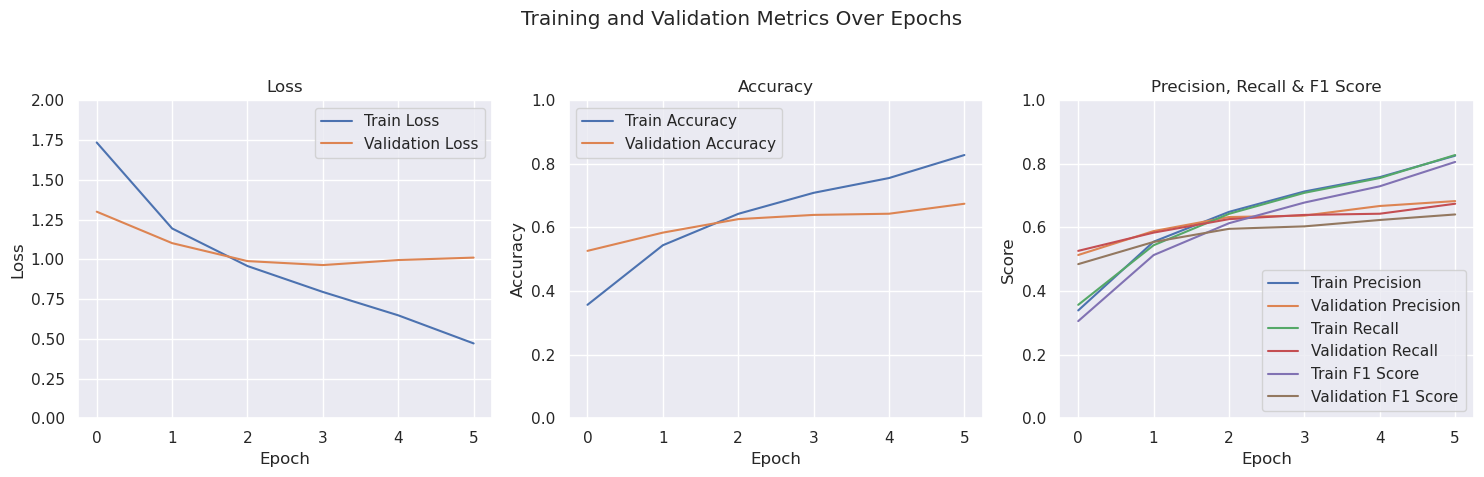

In [ ]:
from torchvision import transforms
# Definiere die Transformationspipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Skaliere alle Bilder auf 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

data_module = ConfigurableDataModule(
    train_data_dir=train_data_path,
    test_data_dir=our_test_data_path,
    batch_size=32,
    train_transform=transform,
    val_test_transform=transform, # Nutzung der gleichen Transformationen
)
model = SimpleCNN(num_classes=9)
callbacks = get_callbacks(
    model_checkpoint_path=model.models_dir,
    early_stop_patience=2
)
train_model(model, data_module, max_epochs=10, logger_name="simple_CNN", callbacks=callbacks)

Allgemeine Hinweise zu den Trainings mit Transfer Learning:
- ALle Modelle wurden auf den DEFAULT-Gewichten von Torchvision trainiert. Dabei handelt es sich bei allen um den IMAGENET_V1 Datensatz
- Die angwendet Transformierungen sind identisch zu jenen die im Training des jeweiligen Modells verwendet wurden und wurden aus der Torchvision Dokumentation entnommen.

### InceptionWasteClassifier

#### Model

In [14]:
from torchvision.models import inception_v3

# Ausgabe der Klassifizierungsschicht
print(inception_v3().fc)

Linear(in_features=2048, out_features=1000, bias=True)


Die Ausgangsschicht erhält eine Feature Map mit eine Größe von 2048 für die Klassifikation und verarbeitet diese zu 1000 Ausgangsfeatures. Diese Schicht wird ausgetauscht und die 1000 durch die 9 Klassen des RealWaste Datensatzes ersetzt.

In [11]:
from torchvision.models import inception_v3

class Inception_v3_WasteClassifier(BaseWasteClassifier):
    def __init__(self, num_classes=9):
        super().__init__(num_classes)
        self.model = inception_v3(aux_logits=True, weights="Inception_V3_Weights.DEFAULT")
        self.model.fc = torch.nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        if self.training:
            outputs = self.model(x)
            return outputs.logits, outputs.aux_logits
        else:
            return self.model(x)


#### Training

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs/Inception_v3
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                | Params
--------------------------------------------------
0 | accuracy  | MulticlassAccuracy  | 0     
1 | precision | MulticlassPrecision | 0     
2 | recall    | MulticlassRecall    | 0     
3 | f1_score  | MulticlassF1Score   | 0     
4 | model     | Inception3          | 25.1 M
--------------------------------------------------
25.1 M    Trainable params
0         Non-trainable params
25.1 M    Total params
100.523   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 119: 'val_loss' reached 0.88803 (best 0.88803), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/Inception_v3_WasteClassifier/models/epoch=0-val_loss=0.89.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 238: 'val_loss' reached 0.50712 (best 0.50712), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/Inception_v3_WasteClassifier/models/epoch=1-val_loss=0.51.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 357: 'val_loss' reached 0.39255 (best 0.39255), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/Inception_v3_WasteClassifier/models/epoch=2-val_loss=0.39.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 476: 'val_loss' reached 0.34862 (best 0.34862), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/Inception_v3_WasteClassifier/models/epoch=3-val_loss=0.35.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 595: 'val_loss' reached 0.30324 (best 0.30324), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/Inception_v3_WasteClassifier/models/epoch=4-val_loss=0.30.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 714: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 833: 'val_loss' reached 0.29049 (best 0.29049), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/Inception_v3_WasteClassifier/models/epoch=6-val_loss=0.29.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 952: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 1071: 'val_loss' was not in top 1
Restoring states from the checkpoint path at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/Inception_v3_WasteClassifier/models/epoch=6-val_loss=0.29.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/Inception_v3_WasteClassifier/models/epoch=6-val_loss=0.29.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃            Test metric            ┃           DataLoader 0            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         our_test_data_acc         │        0.3040544092655182         │
│         our_test_data_f1          │        0.33663487434387207        │
│        our_test_data_loss         │        1.2119717597961426         │
│      our_test_data_precision      │         0.405450701713562         │
│       our_test_data_recall        │        0.3040544092655182         │
│ test_avg_inference_time_per_image │       0.0018275901675224304       │
└───────────────────────────────────┴───────────────────────────────────┘

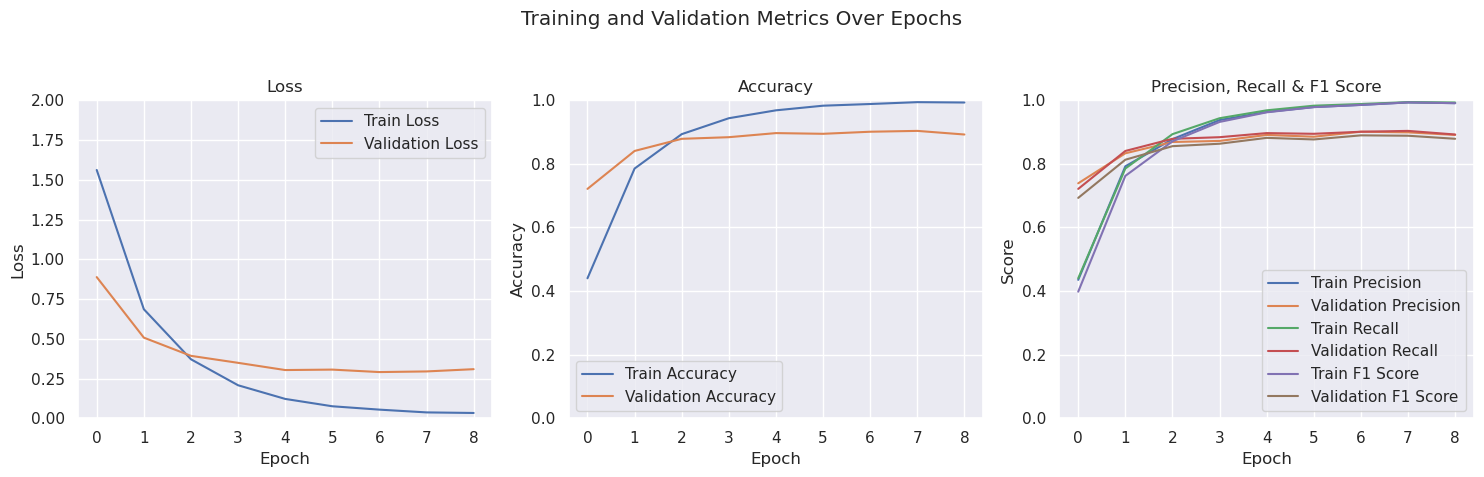

In [ ]:
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode

transform = transforms.Compose([
    transforms.Resize(342, interpolation=InterpolationMode.BILINEAR),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

data_module = ConfigurableDataModule(
    train_data_dir=train_data_path,
    test_data_dir=our_test_data_path,
    batch_size=32,
    train_transform=transform,
    val_test_transform=transform # Nutzung der gleichen Transformationen
)

model = Inception_v3_WasteClassifier()
callbacks = get_callbacks(
    model_checkpoint_path=model.models_dir,
    early_stop_patience=2
)

train_model(model, data_module, max_epochs=50, logger_name="Inception_v3", callbacks=callbacks)

### DenseNetWasteClassifier

#### Model

In [15]:
from torchvision.models import densenet121

print(densenet121().classifier)

Linear(in_features=1024, out_features=1000, bias=True)


Wie beim InceptionV3 wird die letzte Schicht ausgetauscht und die Ausgangsschicht auf 9 Neuronen reduziert.

In [ ]:
from torchvision.models import densenet121

class DenseNet201WasteClassifier(BaseWasteClassifier):
    def __init__(self, num_classes=9):
        super().__init__(num_classes)
        self.model = densenet121(weights="DenseNet121_Weights.DEFAULT")
        self.model.classifier = torch.nn.Linear(self.model.classifier.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

#### Training

In [ ]:
from torchvision.transforms.functional import InterpolationMode
# Define the transformations as per Inception V3's requirements
transform = transforms.Compose([
    transforms.Resize(256, interpolation=InterpolationMode.BILINEAR),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /home/jovyan/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 137MB/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs/DenseNet201
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                | Params
--------------------------------------------------
0 | accuracy  | MulticlassAccuracy  | 0     
1 | precision | MulticlassPrecision | 0     
2 | recall    | MulticlassRecall    | 0     
3 | f1_score  | MulticlassF1Score   | 0     
4 | model     | DenseNet            | 7.0 M 
--------------------------------------------------
7.0 M     Trainable params
0         Non-trainable params
7.0 M     Total params
27.852    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 119: 'val_loss' reached 0.65852 (best 0.65852), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/DenseNet201WasteClassifier/models/epoch=0-val_loss=0.66.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 238: 'val_loss' reached 0.45402 (best 0.45402), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/DenseNet201WasteClassifier/models/epoch=1-val_loss=0.45.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 357: 'val_loss' reached 0.37110 (best 0.37110), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/DenseNet201WasteClassifier/models/epoch=2-val_loss=0.37.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 476: 'val_loss' reached 0.33245 (best 0.33245), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/DenseNet201WasteClassifier/models/epoch=3-val_loss=0.33.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 595: 'val_loss' reached 0.32212 (best 0.32212), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/DenseNet201WasteClassifier/models/epoch=4-val_loss=0.32.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 714: 'val_loss' reached 0.31964 (best 0.31964), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/DenseNet201WasteClassifier/models/epoch=5-val_loss=0.32.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 833: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 952: 'val_loss' reached 0.30941 (best 0.30941), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/DenseNet201WasteClassifier/models/epoch=7-val_loss=0.31.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 1071: 'val_loss' reached 0.30446 (best 0.30446), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/DenseNet201WasteClassifier/models/epoch=8-val_loss=0.30.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 1190: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 1309: 'val_loss' was not in top 1
Restoring states from the checkpoint path at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/DenseNet201WasteClassifier/models/epoch=8-val_loss=0.30.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/DenseNet201WasteClassifier/models/epoch=8-val_loss=0.30.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃            Test metric            ┃           DataLoader 0            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         our_test_data_acc         │        0.2957044541835785         │
│         our_test_data_f1          │        0.29269739985466003        │
│        our_test_data_loss         │        1.3431168794631958         │
│      our_test_data_precision      │        0.37666967511177063        │
│       our_test_data_recall        │        0.2957044541835785         │
│ test_avg_inference_time_per_image │       0.0025140587240457535       │
└───────────────────────────────────┴───────────────────────────────────┘

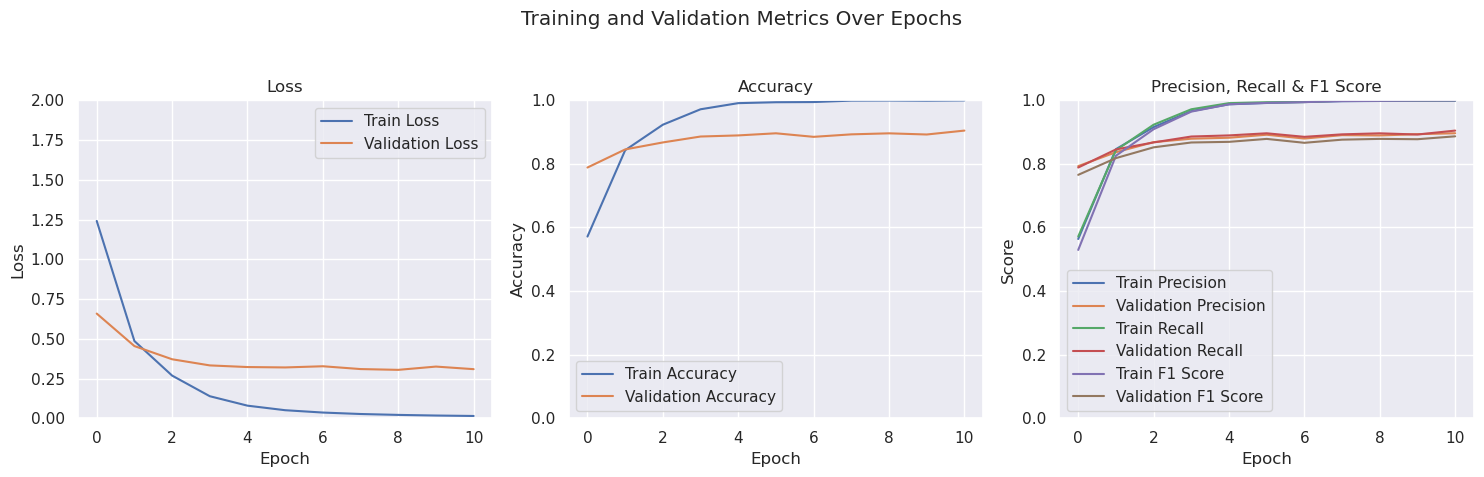

In [ ]:
data_module = ConfigurableDataModule(
    train_data_dir=train_data_path,
    test_data_dir=our_test_data_path,
    batch_size=32,
    train_transform=transform,
    val_test_transform=transform # Nutzung der gleichen Transformationen
)

model = DenseNet201WasteClassifier(num_classes=9)

callbacks = get_callbacks(
    model_checkpoint_path=model.models_dir,
    early_stop_patience=2
)

train_model(
    model,
    data_module,
    max_epochs=50,
    logger_name="DenseNet201",
    callbacks=callbacks
)

### Resnet50

#### Model

In [17]:
from torchvision.models import resnet50

print(resnet50().fc)

Linear(in_features=2048, out_features=1000, bias=True)


Erneutes ersetzen der letzten Schicht durch eine neue Schicht mit den 9 Klassen des Realwaste Datensatzes.

In [ ]:
from torchvision.models import resnet50

class ResNet50WasteClassifier(BaseWasteClassifier):
    def __init__(self, num_classes=9):
        super().__init__(num_classes)
        self.model = resnet50(weights="ResNet50_Weights.DEFAULT")
        self.model.fc = torch.nn.Linear(self.model.fc.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

#### Training

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 162MB/s] 
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs/resnet50
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                | Params
--------------------------------------------------
0 | accuracy  | MulticlassAccuracy  | 0     
1 | precision | MulticlassPrecision | 0     
2 | recall    | MulticlassRecall    | 0     
3 | f1_score  | MulticlassF1Score   | 0     
4 | model     | ResNet              | 23.5 M
--------------------------------------------------
23.5 M    Trainable params
0         Non-trainable params
23.5 M    Total params
94.106    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 119: 'val_loss' reached 1.23299 (best 1.23299), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/ResNet50WasteClassifier/models/epoch=0-val_loss=1.23.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 238: 'val_loss' reached 0.68781 (best 0.68781), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/ResNet50WasteClassifier/models/epoch=1-val_loss=0.69.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 357: 'val_loss' reached 0.50951 (best 0.50951), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/ResNet50WasteClassifier/models/epoch=2-val_loss=0.51.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 476: 'val_loss' reached 0.45103 (best 0.45103), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/ResNet50WasteClassifier/models/epoch=3-val_loss=0.45.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 595: 'val_loss' reached 0.39723 (best 0.39723), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/ResNet50WasteClassifier/models/epoch=4-val_loss=0.40.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 714: 'val_loss' reached 0.38483 (best 0.38483), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/ResNet50WasteClassifier/models/epoch=5-val_loss=0.38.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 833: 'val_loss' reached 0.36704 (best 0.36704), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/ResNet50WasteClassifier/models/epoch=6-val_loss=0.37.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 952: 'val_loss' reached 0.35023 (best 0.35023), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/ResNet50WasteClassifier/models/epoch=7-val_loss=0.35.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 1071: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 1190: 'val_loss' was not in top 1
Restoring states from the checkpoint path at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/ResNet50WasteClassifier/models/epoch=7-val_loss=0.35.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/ResNet50WasteClassifier/models/epoch=7-val_loss=0.35.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃            Test metric            ┃           DataLoader 0            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         our_test_data_acc         │        0.30964359641075134        │
│         our_test_data_f1          │        0.3422154188156128         │
│        our_test_data_loss         │        1.3484816551208496         │
│      our_test_data_precision      │        0.4174957275390625         │
│       our_test_data_recall        │        0.30964359641075134        │
│ test_avg_inference_time_per_image │       0.0009963407646864653       │
└───────────────────────────────────┴───────────────────────────────────┘

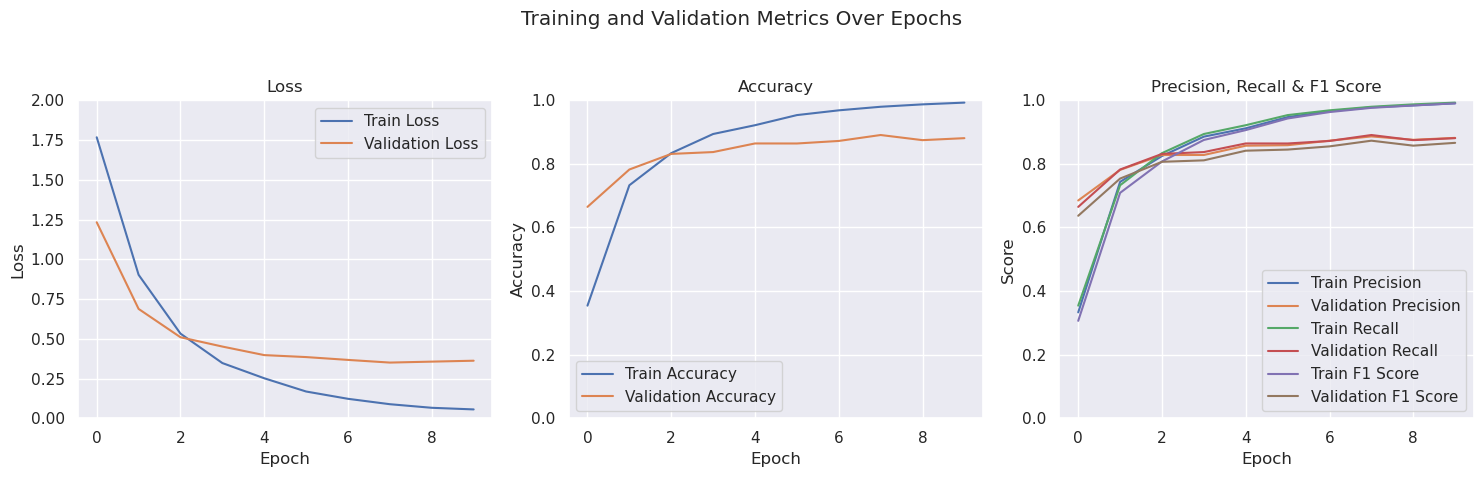

In [ ]:
from torchvision.transforms.functional import InterpolationMode

transform = transforms.Compose([
    transforms.Resize(256, interpolation=InterpolationMode.BILINEAR),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

data_module = ConfigurableDataModule(
    train_data_dir=train_data_path,
    test_data_dir=our_test_data_path,
    batch_size=32,
    train_transform=transform,
    val_test_transform=transform, # Nutzung der gleichen Transformationen
)
model = ResNet50WasteClassifier(num_classes=9)
callbacks = get_callbacks(
    model_checkpoint_path=model.models_dir,
    early_stop_patience=2
)
train_model(model, data_module, max_epochs=50, logger_name="resnet50", callbacks=callbacks)


### VGG16

#### Model

In [ ]:
from torchvision.models import vgg16

print(vgg16().classifier)

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


Die Klassifizierungsschicht des VGG16 besteht aus mehrenen voll verbundenen Schichten. Für das Training wird wieder die letzten Schicht ersetzt durch einen neue Schicht mit 9 Ausgangsneuronen.

In [ ]:
from torchvision.models import vgg16

class VGG16WasteClassifier(BaseWasteClassifier):
    def __init__(self, num_classes=9):
        super().__init__(num_classes)
        self.model = vgg16(weights="VGG16_Weights.DEFAULT")
        in_features = self.model.classifier[6].in_features
        self.model.classifier[6] = torch.nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

#### Training

In [ ]:
from torchvision.transforms.functional import InterpolationMode

transform = transforms.Compose([
    transforms.Resize(256, interpolation=InterpolationMode.BILINEAR),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/jovyan/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 151MB/s] 
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs/vgg16
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                | Params
--------------------------------------------------
0 | accuracy  | MulticlassAccuracy  | 0     
1 | precision | MulticlassPrecision | 0     
2 | recall    | MulticlassRecall    | 0     
3 | f1_score  | MulticlassF1Score   | 0     
4 | model     | VGG                 | 134 M 
--------------------------------------------------
134 M     Trainable params
0         Non-trainable params
134 M     Total params
537.190   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 119: 'val_loss' reached 0.56322 (best 0.56322), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VGG16WasteClassifier/models/epoch=0-val_loss=0.56.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 238: 'val_loss' reached 0.47966 (best 0.47966), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VGG16WasteClassifier/models/epoch=1-val_loss=0.48.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 357: 'val_loss' reached 0.43158 (best 0.43158), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VGG16WasteClassifier/models/epoch=2-val_loss=0.43.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 476: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 595: 'val_loss' reached 0.42828 (best 0.42828), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VGG16WasteClassifier/models/epoch=4-val_loss=0.43.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 714: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 833: 'val_loss' was not in top 1
Restoring states from the checkpoint path at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VGG16WasteClassifier/models/epoch=4-val_loss=0.43.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VGG16WasteClassifier/models/epoch=4-val_loss=0.43.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃            Test metric            ┃           DataLoader 0            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         our_test_data_acc         │        0.2696210443973541         │
│         our_test_data_f1          │        0.27350735664367676        │
│        our_test_data_loss         │        2.3498568534851074         │
│      our_test_data_precision      │        0.38262543082237244        │
│       our_test_data_recall        │        0.2696210443973541         │
│ test_avg_inference_time_per_image │      0.00046158276381902397       │
└───────────────────────────────────┴───────────────────────────────────┘

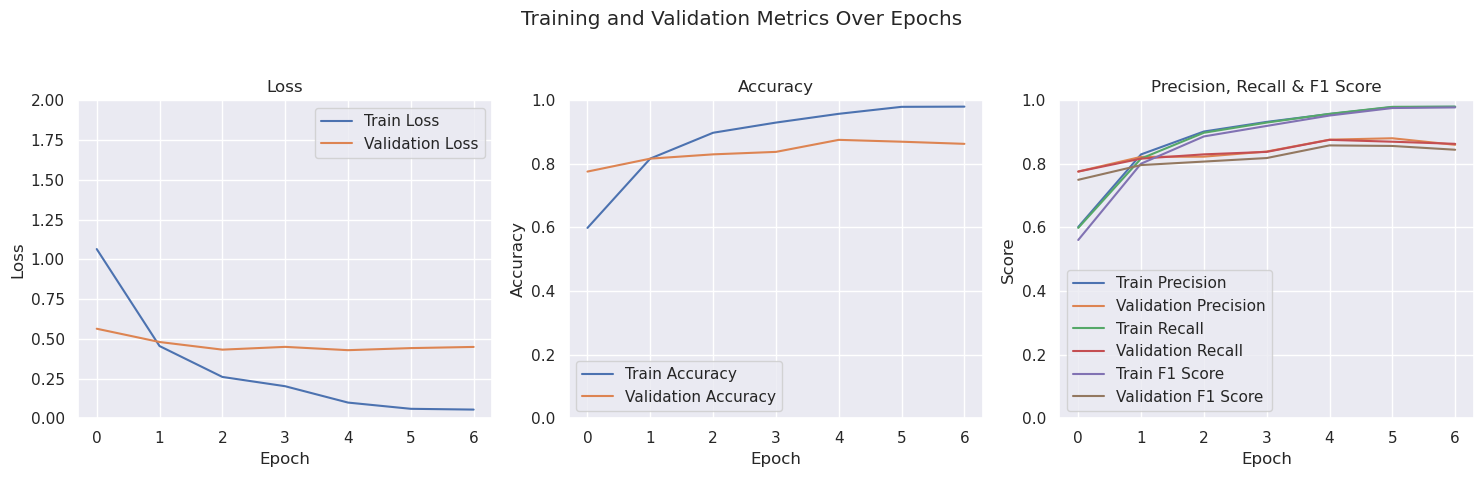

In [ ]:
data_module = ConfigurableDataModule(
    train_data_dir=train_data_path,
    test_data_dir=our_test_data_path,
    batch_size=32,
    train_transform=transform,
    val_test_transform=transform, # Nutzung der gleichen Transformationen
)
model = VGG16WasteClassifier(num_classes=9)
callbacks = get_callbacks(
    model_checkpoint_path=model.models_dir,
    early_stop_patience=2
)
train_model(model, data_module, max_epochs=50, logger_name="vgg16", callbacks=callbacks)

### Vision Transformer

[Torchvision: Vision Transformer](https://pytorch.org/vision/main/models/vision_transformer.html)

Dosovitskiy, A., Beyer, L., Kolesnikov, A., Weissenborn, D., Zhai, X., Unterthiner, T., ... & Houlsby, N. (2020). An image is worth 16x16 words: Transformers for image recognition at scale. arXiv preprint [arXiv:2010.11929](https://arxiv.org/abs/2010.11929).

In [18]:
from torchvision.models import vit_l_16

print(vit_l_16().heads)

Sequential(
  (head): Linear(in_features=1024, out_features=1000, bias=True)
)


#### Model

In [19]:
from torchvision.models import vit_l_16

class VitWasteClassifier(BaseWasteClassifier):
    def __init__(self, num_classes=9):
        super().__init__(num_classes)
        self.model = vit_l_16(weights="ViT_L_16_Weights.IMAGENET1K_V1")
        in_features = self.model.heads.head.in_features
        self.model.heads.head = torch.nn.Linear(in_features=in_features, out_features=num_classes)

    def forward(self, x):
        return self.model(x)

#### Training

Downloading: "https://download.pytorch.org/models/vit_l_16-852ce7e3.pth" to /home/jovyan/.cache/torch/hub/checkpoints/vit_l_16-852ce7e3.pth
100%|██████████| 1.13G/1.13G [00:06<00:00, 178MB/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A2') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
2024-03-03 15:44:20.410409: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 15:44:20.410472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unab

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 119: 'val_loss' reached 0.45626 (best 0.45626), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=0-val_loss=0.46.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 238: 'val_loss' reached 0.30375 (best 0.30375), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=1-val_loss=0.30.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 357: 'val_loss' reached 0.24893 (best 0.24893), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=2-val_loss=0.25.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 476: 'val_loss' reached 0.24058 (best 0.24058), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=3-val_loss=0.24.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 595: 'val_loss' reached 0.23407 (best 0.23407), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=4-val_loss=0.23-v1.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 714: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 833: 'val_loss' was not in top 1
Restoring states from the checkpoint path at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=4-val_loss=0.23-v1.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=4-val_loss=0.23-v1.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃            Test metric            ┃           DataLoader 0            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         our_test_data_acc         │        0.24327826499938965        │
│         our_test_data_f1          │        0.2771439552307129         │
│        our_test_data_loss         │        1.3834747076034546         │
│      our_test_data_precision      │        0.3549366295337677         │
│       our_test_data_recall        │        0.24327826499938965        │
│ test_avg_inference_time_per_image │        0.00601927051320672        │
└───────────────────────────────────┴───────────────────────────────────┘

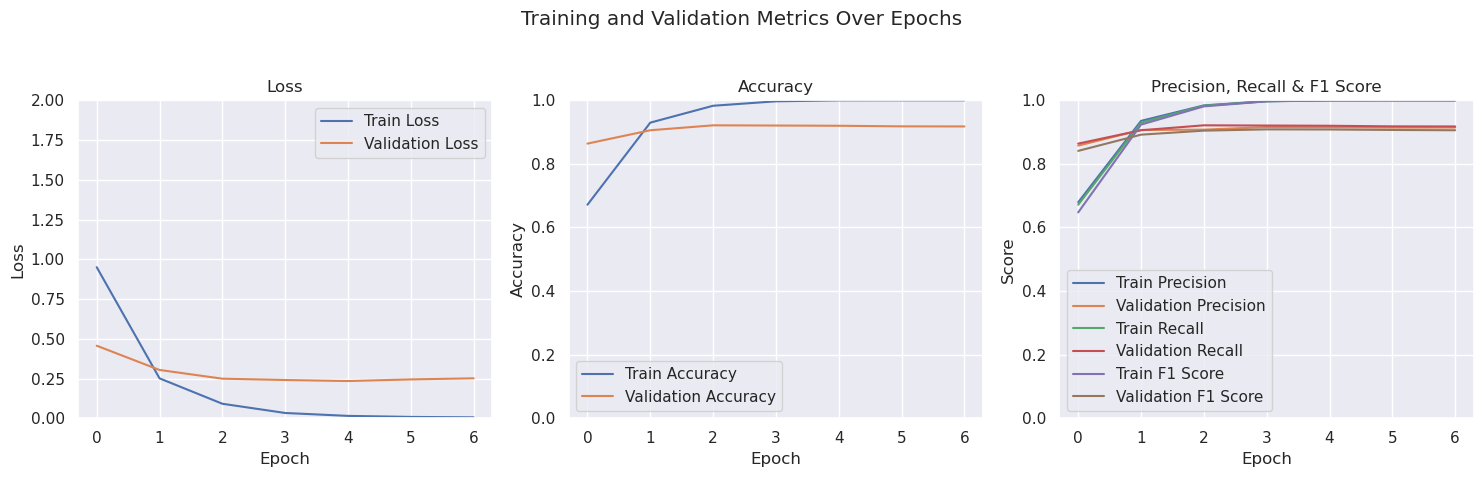

In [20]:
from torchvision.transforms.functional import InterpolationMode

transform = transforms.Compose([
    transforms.Resize(242, interpolation=InterpolationMode.BILINEAR),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
data_module = ConfigurableDataModule(
    train_data_dir=train_data_path,
    test_data_dir=our_test_data_path,
    batch_size=32,
    train_transform=transform,
    val_test_transform=transform # Nutzung der gleichen Transformationen
)
model = VitWasteClassifier(num_classes=9)
callbacks = get_callbacks(
    model_checkpoint_path=model.models_dir,
    early_stop_patience=2
)
train_model(
    model,
    data_module,
    max_epochs=10,
    logger_name="ViT_L_16",
    callbacks=callbacks
)

### Vision Transformer Balanced

#### Model

In [21]:
from torchvision.models import vit_b_16

print(vit_b_16().heads)

Sequential(
  (head): Linear(in_features=768, out_features=1000, bias=True)
)


In [ ]:
from torchvision.models import vit_b_16

class VitWasteClassifier(BaseWasteClassifier):
    def __init__(self, num_classes=9):
        super().__init__(num_classes)
        self.model = vit_b_16(weights="ViT_B_16_Weights.IMAGENET1K_V1")
        in_features = self.model.heads.head.in_features
        self.model.heads.head = torch.nn.Linear(in_features=in_features, out_features=num_classes)

    def forward(self, x):
        return self.model(x)

#### Training

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /home/jovyan/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:03<00:00, 115MB/s]  
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: tb_logs/ViT_B_16
/opt/conda/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:652: Checkpoint directory /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                | Params
--------------------------------------------------
0 | accuracy  | MulticlassAccuracy  | 0     
1 | precision | MulticlassPrecision | 0     
2 | recall    | MulticlassRecall    | 0     
3 | f1_score  | MulticlassF1Score   | 0     
4 | model     | VisionTransformer   | 85.8 M
-----------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 119: 'val_loss' reached 0.56185 (best 0.56185), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=0-val_loss=0.56.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 238: 'val_loss' reached 0.41846 (best 0.41846), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=1-val_loss=0.42.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 357: 'val_loss' reached 0.31698 (best 0.31698), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=2-val_loss=0.32.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 476: 'val_loss' reached 0.29735 (best 0.29735), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=3-val_loss=0.30.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 595: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 714: 'val_loss' reached 0.27728 (best 0.27728), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=5-val_loss=0.28.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 833: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 952: 'val_loss' was not in top 1
Restoring states from the checkpoint path at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=5-val_loss=0.28.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=5-val_loss=0.28.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃            Test metric            ┃           DataLoader 0            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         our_test_data_acc         │        0.2296963483095169         │
│         our_test_data_f1          │        0.27433133125305176        │
│        our_test_data_loss         │        1.7348800897598267         │
│      our_test_data_precision      │        0.3805507719516754         │
│       our_test_data_recall        │        0.2296963483095169         │
│ test_avg_inference_time_per_image │      0.00018966503557749093       │
└───────────────────────────────────┴───────────────────────────────────┘

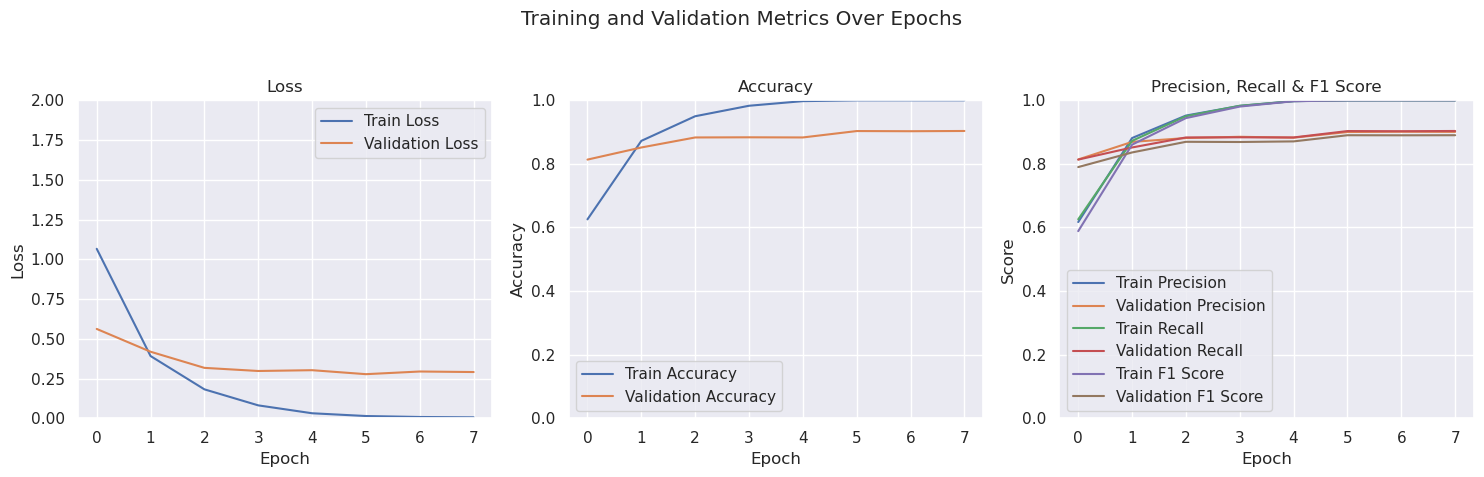

In [ ]:
from torchvision.transforms.functional import InterpolationMode

transform = transforms.Compose([
    transforms.Resize(242, interpolation=InterpolationMode.BILINEAR),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
data_module = ConfigurableDataModule(
    train_data_dir=train_data_path,
    test_data_dir=our_test_data_path,
    batch_size=32,
    train_transform=transform,
    val_test_transform=transform # Nutzung der gleichen Transformationen
)
model = VitWasteClassifier(num_classes=9)
callbacks = get_callbacks(
    model_checkpoint_path=model.models_dir,
    early_stop_patience=2
)
train_model(
    model,
    data_module,
    max_epochs=10,
    logger_name="ViT_B_16",
    version_name="ViT_B_16",
    callbacks=callbacks
)

### AlexNet

#### Model

In [ ]:
from torchvision.models import alexnet

class AlexNetWasteClassifier(BaseWasteClassifier):
    def __init__(self, num_classes=9):
        super().__init__(num_classes)
        self.model = alexnet(weights="AlexNet_Weights.DEFAULT")
        in_features = self.model.classifier[6].in_features
        self.model.classifier[6] = torch.nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.model(x)

#### Training

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                | Params
--------------------------------------------------
0 | accuracy  | MulticlassAccuracy  | 0     
1 | precision | MulticlassPrecision | 0     
2 | recall    | MulticlassRecall    | 0     
3 | f1_score  | MulticlassF1Score   | 0     
4 | model     | AlexNet             | 57.0 M
--------------------------------------------------
57.0 M    Trainable params
0         Non-trainable params
57.0 M    Total params
228.163   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 119: 'val_loss' reached 0.68203 (best 0.68203), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/AlexNetWasteClassifier/models/epoch=0-val_loss=0.68.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 238: 'val_loss' reached 0.58930 (best 0.58930), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/AlexNetWasteClassifier/models/epoch=1-val_loss=0.59.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 357: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 476: 'val_loss' reached 0.49309 (best 0.49309), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/AlexNetWasteClassifier/models/epoch=3-val_loss=0.49.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 595: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 714: 'val_loss' was not in top 1
Restoring states from the checkpoint path at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/AlexNetWasteClassifier/models/epoch=3-val_loss=0.49.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/AlexNetWasteClassifier/models/epoch=3-val_loss=0.49.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃            Test metric            ┃           DataLoader 0            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         our_test_data_acc         │        0.26566797494888306        │
│         our_test_data_f1          │        0.27649062871932983        │
│        our_test_data_loss         │         2.182025671005249         │
│      our_test_data_precision      │        0.36571627855300903        │
│       our_test_data_recall        │        0.26566797494888306        │
│ test_avg_inference_time_per_image │      0.00015935770352371037       │
└───────────────────────────────────┴───────────────────────────────────┘

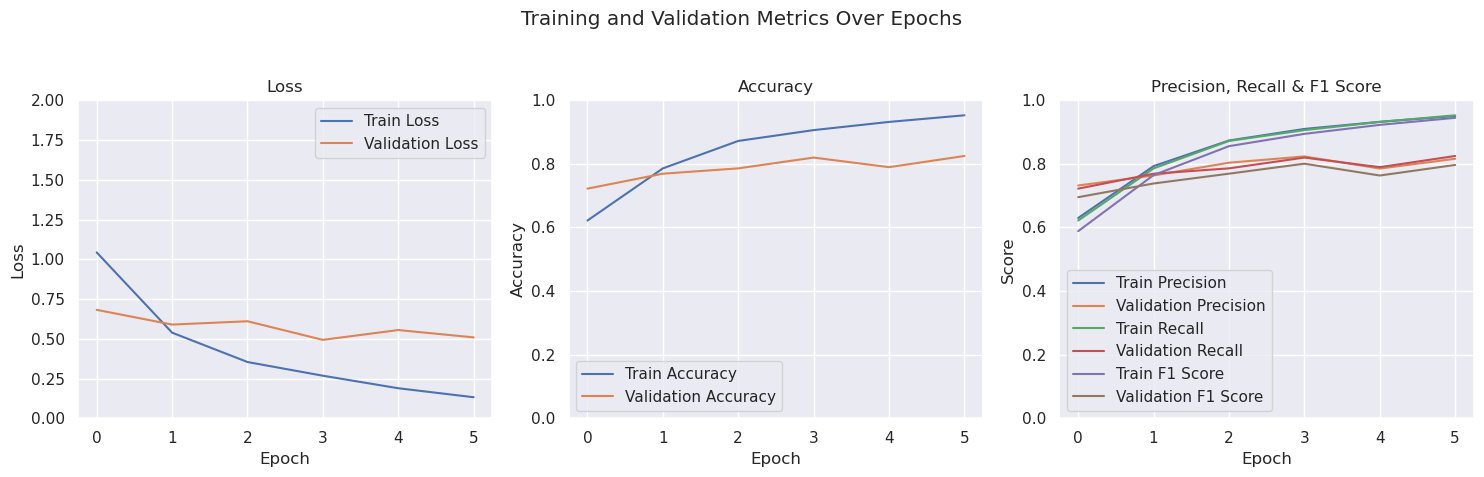

In [ ]:
from torchvision.transforms.functional import InterpolationMode
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256, interpolation=InterpolationMode.BILINEAR),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

data_module = ConfigurableDataModule(
    train_data_dir=train_data_path,
    test_data_dir=our_test_data_path,
    batch_size=32,
    train_transform=transform,
    val_test_transform=transform, # Nutzung der gleichen Transformationen
)
model = AlexNetWasteClassifier(num_classes=9)
callbacks = get_callbacks(
    model_checkpoint_path=model.models_dir,
    early_stop_patience=2
)
train_model(model, data_module, max_epochs=50, logger_name="AlexNet", callbacks=callbacks)

## Augmentierungen und Hpyterparameter Tuning mit Vision Transformer

### Auswahl der Augmentierungen

Die Augmentierung wurden basierende aus den Ergebnissen aus der Explorativen Datenanalyse, sowie Erkenntnissen aus dem wissenschaftlichen Artikel zum RealWaste Datensatz (vgl. Single [2023](https://www.mdpi.com/2078-2489/14/12/633), S. 7) zum Thema Müllklassifizierung ausgewählt:
- **Random Rotation (15 Grad)**:
  - Versucht das Risiko von Overfitting zu minimieren, indem es das Modell unempfindlicher gegen andere Ausrichtung des Mülls auf den Bildern macht.

- **Color Jitter**:
  - Basierend auf den Erkenntnissen, dass nach dem Chi-Quadrat-Test besondersn die Standardabweichung und der Mittelwert der Farbkanäle eine erhöhte Relevanz haben, werden mit dem Color Jitter die Helligkeit, der Kontrast und die Sättigung zufällig minimal abgeändert. Die Pixelwerte werden um einen Faktor der jeweiligen Eigenschaft angepasst, welche gleichmäßig aus einem Wertebereich von `[max(0, 1 - parameter), 1 + parameter]` entnommen werden. Beispielsweise bewirkt `brightness=0.2`, dass die Hellgikeit um einen Faktoren aus dem Wertebereich [0.8,1.2] verändert wird (vgl. torchvision [2017](https://pytorch.org/vision/main/generated/torchvision.transforms.ColorJitter.html)).
  - **Helligkeit**: Beeinflusst besonders `blue_mean` und `green_mean`.
  - **Kontrast**: Beeinflusst die Standardabweichungen der Farbkanäle.
  - **Sättigung**: Verändert die Mittelwerte der Farbkanäle, insbesondere bei intensiven Farben.

- **Random Horizontal Flip**:
  - Generaliziert das Modell hinsichtlich der Richtung in die das Objekt ausgerichtet ist. Kombiniert mit `Random Rotation` werden viele verschiedene Ausrichtung abgedeckt.

- **Random Affine**:
  - Simuliert Verzerrungen des Bildes, welche beispielsweise entstehen von das Bild aus einem anderen Winkel aufgenommen wurde.

### Hyperparameter Tuning

Damit der Effekt von Augmentierung nicht einzelnd überprüft werden muss, werden die Parameter mit in das Hyperparameter-Tuning aufgenommen. Im Anschluss werden die Ergebnisse kurz interpretiert und das Modell mit den ermittelten Einstellung trainiert. Während des Prozesses findet ausschließlich das Logging mit Tensorboard statt.

Für das Hyperparameter Tuning wurde das Paket [Ray](https://docs.ray.io) gewählt, da dieses sowohl die neuste Version von PyTorch Lightning als auch Apple Silicon Chips (M1) unterstützt. Für das Hyperparameter wird eine Objektiv-Funktion definiert, welche die Einstellungen eines Versuches in die einzelnen Komponenten einfügt. Als Einstellung für die Versuche werden folgende Wertebereich gewählt:

- **Batch Größe** (batch_size): Für die Batchgröße werden die diskreten Werte 16, 32 und 64 Bilder gewählt, wobei mit einbezogen wird, dass zu große Batchgrößen auch zur maixmal ausgelastet VRAM der GPU führen können.
- **Learnrate** (learning_rate): Bei der Lernrate wurde ein Bereich gewählt, welcher auf einer logarithmischen Skala betrachtet wird. Dabei werden die Warte gleichmäßig aus den logarithmierten Werten des Wertebereiches gezogen. Dies ist sinnvoll bei der Lernrate, weil eine starke Veränderung auch große Effekt auf das Ergebnis haben kann. Bei der logarithmierten Skala werden Werte aus dem unteren Wertebereich bevorzugt, bei welchen ein geringeres Risiko des Overfittings zu erwarten ist. Gleichzeitig werden Werte aus dem oberen Wertebereich nicht vollständig ausgeschlossen, haben jedoch eine geringe Wahrscheinlichkeit genommen zu werden.
- **Helligkeit, Kontrast und Sättigung**: Bei den Parameter des ColorJitters werden Werte innerhalb des Bereiches [0, 0.2] mit der gleicher Wahrscheinlichkeit als Parameter gewählt. 

Für den ASHAScheduler wurden folgenden Einstellungen gewählt:
- **Metrik** (metric): Die Metrik die beobachtet werden soll, um einen Versuch zu bewerte. Hier wurde `loss` angegeben, was für die Validierungs-Loss steht.
- **Modus** (mode): `min` steht dafür, dass die Loss minimiert werden soll.
- **Maximale Iterationen** (max_t): Steht für die Anzahl der Epoch die ein Versuch maximal durchlaufen soll.
- **Gnadenfrist** (grace_period): Anzahl von Durchläufen die gewartet wird bevor ein Versuch abgebrochen wird. Aufgrund der geringen Anzahl von Epochen, die bei dem ViT Modell notwenig waren, wird dieser Wert auf 1 gesetzt.
- **Reduktionsfaktor** (reduction_factor): Es wird bei dem Training ein Reduktionsfaktor von 2 verwendet. Das bedeutet, dass nach Ablauf der Gnadenfrist die Versuche nach jedem Lauf halbiert werden. Dies bedeutet, dass von einer gegebenen Anzahl von Versuchen nach jeder Evaluationsrunde nur die Hälfte der leistungsstärksten Versuche fortgesetzt wird. 

In [ ]:
from ray import tune
from ray.tune.schedulers import ASHAScheduler
from ray.tune.integration.pytorch_lightning import TuneReportCallback
from ray.train.lightning import prepare_trainer
import pytorch_lightning as pl
from torchvision import transforms
from torchvision.models import vit_b_16
import torch

# Wir überschreiben die Klasse, weil wir auf den Scheduler hier verzichten können, diese würde den Prozess nur unnötig verlängern
class VitWasteClassifier(BaseWasteClassifier):
    def __init__(self, num_classes=9, learning_rate=1e-3):
        super().__init__(num_classes)
        self.save_hyperparameters()
        self.model = vit_b_16(weights="ViT_B_16_Weights.DEFAULT")
        in_features = self.model.heads.head.in_features
        self.model.heads.head = torch.nn.Linear(in_features=in_features, out_features=num_classes)

    def forward(self, x):
        return self.model(x)

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.hparams.learning_rate, momentum=0.9)
        return optimizer



def train_func(config):
    # Transformations Pipeline definieren
    transform = transforms.Compose([
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(brightness=config["brightness"], contrast=config["contrast"], saturation=config["saturation"]),
        transforms.RandomHorizontalFlip(),
        transforms.RandomAffine(degrees=0, shear=config["shear"]),
        transforms.Resize(242, interpolation=transforms.InterpolationMode.BILINEAR),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Datenmodul mit Batchgröße aus der Config initialisieren
    data_module = ConfigurableDataModule(
        train_data_dir=train_data_path,
        test_data_dir=our_test_data_path,
        batch_size=config["batch_size"],
        train_transform=transform,
        val_test_transform=transform,
    )

    # Model mit Learning-Rate aus der Config initialisieren
    model = VitWasteClassifier(num_classes=9, learning_rate=config["learning_rate"])

    # Trainer initialisieren mit Extra Callback, welche einen Versuch vorzeitig abbricht, wenn er deutlich schlechter ist als vorherige
    trainer = pl.Trainer(
        max_epochs=10, 
        callbacks=[TuneReportCallback({"loss": "val_loss"}, on="validation_end")], # bricht Versuch ab, wenn Validierungs_loss schlechter als in anderen Versuchen
        enable_progress_bar=False,
    )

    # Training beginnen
    trainer.fit(model, datamodule=data_module)


# Parameterraum bestimmen
config = {
    "batch_size": tune.choice([16, 32, 64]),
    "learning_rate": tune.loguniform(1e-5, 1e-1),
    "brightness": tune.uniform(0.0, 0.2),
    "contrast": tune.uniform(0.0, 0.2),
    "saturation": tune.uniform(0.0, 0.2),
    "shear": tune.uniform(5, 25)
}

# ASHAScheduler zum frühzeitigen stoppen von schelchter Versuchen
scheduler = ASHAScheduler(
    metric="loss", # zu beobachtende Loss, hier steht loss für Validierungs-Loss
    mode="min",
    max_t=10, # Anzahl der Versuche
    grace_period=1, # Anzahl von Epochen die gewartet wird, bevor ein Versuch abgebrochen wird
    reduction_factor=2 # Bestimmt dass die Anzahl der Versuche im Hyperband-Algorithmus halbiert werden.
)
hpo_logs_dir = train_data_path.parent / "hpo_logs"
hpo_logs_dir.mkdir(parents=True, exist_ok=True)
# Launch the tuning job with Ray Tune
analysis = tune.run(
    train_func,
    resources_per_trial={
        "cpu": 8,
        "gpu": 1 
    },
    config=config,
    num_samples=10,  # Anzahl der Hypaparemeter-Sets
    scheduler=scheduler,
    local_dir=str(hpo_logs_dir),
    log_to_file=True,
    progress_reporter=tune.CLIReporter(metric_columns=["loss", "training_iteration"]),
)

# Besten Versuch ausgeben
best_trial = analysis.get_best_trial("loss", "min", "all")
print("Best trial config: ", best_trial.config)
print("Best trial final validation loss: ", best_trial.last_result["loss"])


2024-02-29 10:17:59,449	WARNING services.py:1996 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 6442450944 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=7.43gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2024-02-29 10:18:00,618	INFO worker.py:1724 -- Started a local Ray instance.
2024-02-29 10:18:00,950	INFO tune.py:220 -- Initializing Ray automatically. For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run(...)`.
2024-02-29 10:18:00,952	INFO tune.py:583 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
2024-02-29 10:

== Status ==
Current time: 2024-02-29 10:18:01 (running for 00:00:00.25)
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Logical resource usage: 8.0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:RTX)
Result logdir: /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/hpo_logs/train_func_2024-02-29_10-18-00
Number of trials: 10/10 (10 PENDING)
+------------------------+----------+-------+--------------+--------------+------------+-----------------+--------------+----------+
| Trial name             | status   | loc   |   batch_size |   brightness |   contrast |   learning_rate |   saturation |    shear |
|------------------------+----------+-------+--------------+--------------+------------+-----------------+--------------+----------|
| train_func_d1278_00000 | PENDING  |       |           32 |    0.0838655 | 0.0427244  |     3.30699e-05 |    0.126879  | 21.8228  |
| train_func_d1278_00001 | PENDING  |       

(train_func pid=1771) Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /home/jovyan/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
  0%|          | 0.00/330M [00:00<?, ?B/s]
  2%|▏         | 7.61M/330M [00:00<00:04, 79.7MB/s]
  5%|▌         | 17.1M/330M [00:00<00:03, 91.1MB/s]
  9%|▉         | 28.9M/330M [00:00<00:02, 106MB/s] 
 12%|█▏        | 40.1M/330M [00:00<00:02, 111MB/s]
 16%|█▌        | 51.3M/330M [00:00<00:02, 113MB/s]
 19%|█▉        | 62.4M/330M [00:00<00:02, 114MB/s]
 22%|██▏       | 73.6M/330M [00:00<00:02, 115MB/s]
 26%|██▌       | 84.7M/330M [00:00<00:02, 116MB/s]
 29%|██▉       | 95.9M/330M [00:00<00:02, 116MB/s]


== Status ==
Current time: 2024-02-29 10:18:06 (running for 00:00:05.30)
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Logical resource usage: 8.0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:RTX)
Result logdir: /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/hpo_logs/train_func_2024-02-29_10-18-00
Number of trials: 10/10 (9 PENDING, 1 RUNNING)
+------------------------+----------+-------------------+--------------+--------------+------------+-----------------+--------------+----------+
| Trial name             | status   | loc               |   batch_size |   brightness |   contrast |   learning_rate |   saturation |    shear |
|------------------------+----------+-------------------+--------------+--------------+------------+-----------------+--------------+----------|
| train_func_d1278_00000 | RUNNING  | 10.1.255.164:1771 |           32 |    0.0838655 | 0.0427244  |     3.30699e-05 |    0.126879 

 32%|███▏      | 107M/330M [00:01<00:02, 116MB/s] 
 36%|███▌      | 118M/330M [00:01<00:01, 117MB/s]
 43%|████▎     | 140M/330M [00:01<00:01, 117MB/s]
 46%|████▌     | 152M/330M [00:01<00:01, 117MB/s]
 49%|████▉     | 163M/330M [00:01<00:01, 117MB/s]
 53%|█████▎    | 174M/330M [00:01<00:01, 117MB/s]
 56%|█████▌    | 185M/330M [00:01<00:01, 117MB/s]
 59%|█████▉    | 196M/330M [00:01<00:01, 117MB/s]
 63%|██████▎   | 207M/330M [00:01<00:01, 117MB/s]
 66%|██████▌   | 218M/330M [00:02<00:01, 117MB/s]
 70%|██████▉   | 230M/330M [00:02<00:00, 117MB/s]
 73%|███████▎  | 241M/330M [00:02<00:00, 117MB/s]
 76%|███████▋  | 252M/330M [00:02<00:00, 117MB/s]
 80%|███████▉  | 263M/330M [00:02<00:00, 117MB/s]
 83%|████████▎ | 274M/330M [00:02<00:00, 117MB/s]
 86%|████████▋ | 285M/330M [00:02<00:00, 117MB/s]
 90%|████████▉ | 297M/330M [00:02<00:00, 117MB/s]
 93%|█████████▎| 308M/330M [00:02<00:00, 117MB/s]
 97%|█████████▋| 319M/330M [00:02<00:00, 117MB/s]
100%|██████████| 330M/330M [00:03<00:00, 115MB/s]

== Status ==
Current time: 2024-02-29 10:18:11 (running for 00:00:10.36)
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: None
Logical resource usage: 8.0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:RTX)
Result logdir: /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/hpo_logs/train_func_2024-02-29_10-18-00
Number of trials: 10/10 (9 PENDING, 1 RUNNING)
+------------------------+----------+-------------------+--------------+--------------+------------+-----------------+--------------+----------+
| Trial name             | status   | loc               |   batch_size |   brightness |   contrast |   learning_rate |   saturation |    shear |
|------------------------+----------+-------------------+--------------+--------------+------------+-----------------+--------------+----------|
| train_func_d1278_00000 | RUNNING  | 10.1.255.164:1771 |           32 |    0.0838655 | 0.0427244  |     3.30699e-05 |    0.126879 

Trial name,loss
train_func_d1278_00000,1.4123


== Status ==
Current time: 2024-02-29 10:19:22 (running for 00:01:21.54)
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 8.000: None | Iter 4.000: None | Iter 2.000: None | Iter 1.000: -1.9043489694595337
Logical resource usage: 8.0/8 CPUs, 1.0/1 GPUs (0.0/1.0 accelerator_type:RTX)
Result logdir: /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/hpo_logs/train_func_2024-02-29_10-18-00
Number of trials: 10/10 (9 PENDING, 1 RUNNING)
+------------------------+----------+-------------------+--------------+--------------+------------+-----------------+--------------+----------+---------+----------------------+
| Trial name             | status   | loc               |   batch_size |   brightness |   contrast |   learning_rate |   saturation |    shear |    loss |   training_iteration |
|------------------------+----------+-------------------+--------------+--------------+------------+-----------------+--------------+----------+---------+----------------------|
| train_func_d127

### Hyperparameter Tuning Ergebnisse

Die Ergebnisse des Hyperparametertests werden in einem relativen Pfad unter `/hpo_logs` gespeichert, sodass diese auch in einer neuen Session geladen werden können. Für neue Läufe muss die Variable `EXPERIMENT_NAME` mit den jeweiligen Ordnernamen angepasst werden.

In [25]:
from ray.tune.analysis.experiment_analysis import ExperimentAnalysis

# Hier den Namen des Experimentes anpassen
EXPERIMENT_NAME = "train_func_2024-02-29_10-18-00"

hpo_logs_dir = train_data_path.parent / "hpo_logs"
tune_log_dir = hpo_logs_dir / EXPERIMENT_NAME

analysis = ExperimentAnalysis(tune_log_dir)
analysis.default_metric = "loss"
analysis.default_mode = "min"
analysis.best_config

{'batch_size': 64,
 'learning_rate': 0.0008130201056019545,
 'brightness': 0.04336242687326637,
 'contrast': 0.07431887412388818,
 'saturation': 0.1413833144433656,
 'shear': 6.186706741294062}

In [ ]:
analysis.results_df.sort_values("loss")

,loss,timestamp,checkpoint_dir_name,done,training_iteration,date,time_this_iter_s,time_total_s,pid,hostname,node_ip,time_since_restore,iterations_since_restore,experiment_tag,config/batch_size,config/learning_rate,config/brightness,config/contrast,config/saturation,config/shear
trial_id,,,,,,,,,,,,,,,,,,,,
d1278_00008,0.252400,1709205550,None,True,10,2024-02-29_11-19-10,58.055703,590.031788,866913,jupyter-keno-2eteppris1,10.1.255.164,590.031788,10,"8_batch_size=64,brightness=0.0434,contrast=0.0...",64,0.000813,0.043362,0.074319,0.141383,6.186707
d1278_00002,0.253640,1709203422,None,True,10,2024-02-29_10-43-42,58.917614,590.634821,252796,jupyter-keno-2eteppris1,10.1.255.164,590.634821,10,"2_batch_size=64,brightness=0.1563,contrast=0.0...",64,0.000938,0.156299,0.061760,0.173664,15.659861
d1278_00003,0.310867,1709204013,None,True,10,2024-02-29_10-53-33,57.329091,583.864699,426374,jupyter-keno-2eteppris1,10.1.255.164,583.864699,10,"3_batch_size=64,brightness=0.1461,contrast=0.0...",64,0.000441,0.146104,0.029302,0.125506,23.319505
d1278_00005,0.340802,1709204749,None,True,10,2024-02-29_11-05-49,66.246029,652.863713,625153,jupyter-keno-2eteppris1,10.1.255.164,652.863713,10,"5_batch_size=32,brightness=0.0140,contrast=0.1...",32,0.001206,0.014040,0.106892,0.112658,22.300106
d1278_00009,0.570588,1709205818,None,True,4,2024-02-29_11-23-38,63.910624,260.822920,1040631,jupyter-keno-2eteppris1,10.1.255.164,260.822920,4,"9_batch_size=32,brightness=0.1954,contrast=0.0...",32,0.008748,0.195395,0.027735,0.160626,21.371790
d1278_00000,0.935334,1709202543,None,True,10,2024-02-29_10-29-03,64.344630,658.694031,1771,jupyter-keno-2eteppris1,10.1.255.164,658.694031,10,"0_batch_size=32,brightness=0.0839,contrast=0.0...",32,0.000033,0.083865,0.042724,0.126879,21.822803
d1278_00007,0.936140,1709204953,None,True,2,2024-02-29_11-09-13,59.548261,121.653418,825590,jupyter-keno-2eteppris1,10.1.255.164,121.653418,2,"7_batch_size=64,brightness=0.1935,contrast=0.0...",64,0.025195,0.193509,0.052256,0.146774,23.953776
d1278_00001,1.553072,1709202824,None,True,4,2024-02-29_10-33-44,70.368389,273.169276,177315,jupyter-keno-2eteppris1,10.1.255.164,273.169276,4,"1_batch_size=16,brightness=0.1635,contrast=0.0...",16,0.023395,0.163461,0.009518,0.178358,19.679148
d1278_00004,2.106512,1709204088,None,True,1,2024-02-29_10-54-48,67.986844,67.986844,599952,jupyter-keno-2eteppris1,10.1.255.164,67.986844,1,"4_batch_size=16,brightness=0.2000,contrast=0.0...",16,0.000010,0.199956,0.034525,0.083510,19.822321


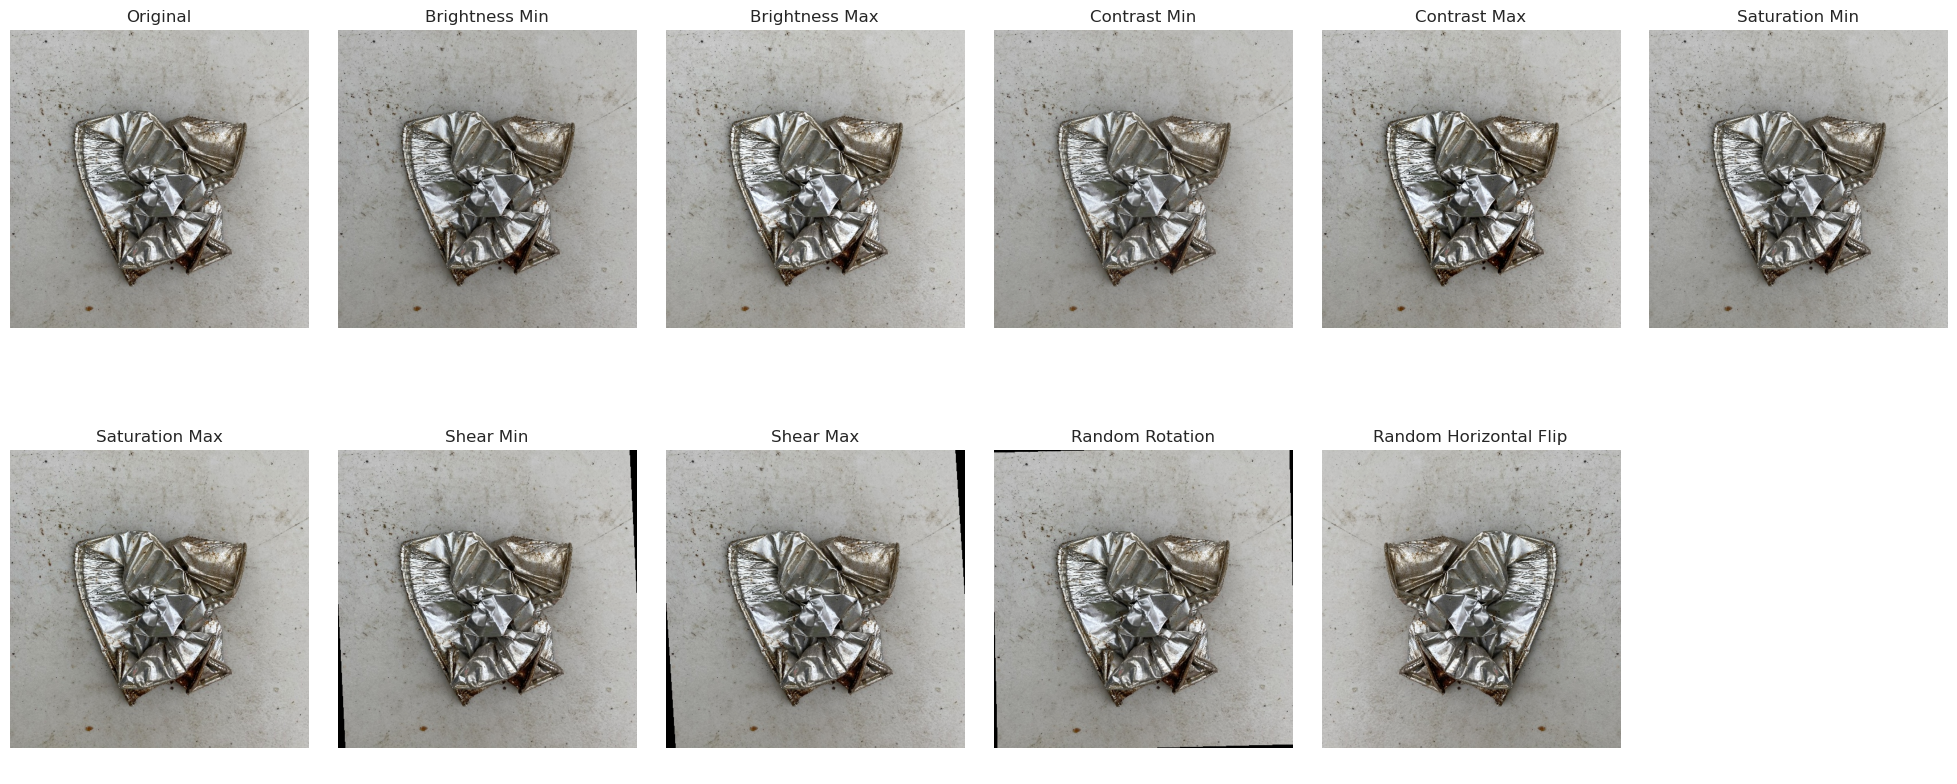

In [46]:
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
from PIL import Image

def visualize_augmentation(dataset, best_config):
    contrast_min, contrast_max = 1 - best_config['contrast'], 1 + best_config['contrast']
    brightness_min, brightness_max = 1 - best_config['brightness'], 1 + best_config['brightness']
    saturation_min, saturation_max = 1 - best_config['saturation'], 1 + best_config['saturation']
    shear_min, shear_max = best_config['shear'], best_config['shear']
    
    transformations = {
        'Original': None,  # Original image without any transformation
        'Brightness Min': transforms.ColorJitter(brightness=(brightness_min, brightness_min)),
        'Brightness Max': transforms.ColorJitter(brightness=(brightness_max, brightness_max)),
        'Contrast Min': transforms.ColorJitter(contrast=(contrast_min, contrast_min)),
        'Contrast Max': transforms.ColorJitter(contrast=(contrast_max, contrast_max)),
        'Saturation Min': transforms.ColorJitter(saturation=(saturation_min, saturation_min)),
        'Saturation Max': transforms.ColorJitter(saturation=(saturation_max, saturation_max)),
        'Shear Min': transforms.RandomAffine(degrees=0, shear=shear_min),
        'Shear Max': transforms.RandomAffine(degrees=0, shear=shear_max),
        'Random Rotation': transforms.RandomRotation(degrees=15),
        'Random Horizontal Flip': transforms.RandomHorizontalFlip(),
    }

    img, _ = dataset[0]  # Nehme das erste Bild für die Demonstration
    if isinstance(img, torch.Tensor):
        img = transforms.ToPILImage()(img)  # Convert tensor to PIL Image if necessary

    # Prepare subplots for 11 transformations, with 6 in the first row and 5 in the second
    fig, axes = plt.subplots(2, -(-len(transformations) // 2), figsize=(25, 10), gridspec_kw={'wspace':0.1, 'hspace':0.2})
    axes = axes.flatten()

    for i, (title, transform) in enumerate(transformations.items()):
        if transform is not None:
            # Apply the transformation
            transformed_img = transform(img)
        else:
            transformed_img = img  # Original image
        
        # Convert to tensor for consistent display
        transformed_img = transforms.ToTensor()(transformed_img)
        
        axes[i].imshow(transformed_img.permute(1, 2, 0).clamp(0, 1).numpy())  # Clamp to [0, 1] for display
        axes[i].set_title(title)
        axes[i].axis('off')
    
    # Hide any unused axes if they exist
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.show()

data_module = ConfigurableDataModule(
    train_data_dir=train_data_path,
    test_data_dir=our_test_data_path,
    batch_size=32,
    train_transform=None,
    val_test_transform=None,
)    
data_module.setup("fit")

visualize_augmentation(data_module.val_dataset, analysis.best_config)

Die Visualisierungen zeigen, dass die optimalen Einstellungen für die Transformationen beim ColorJitter eine relativ geringen Veränderung mit sich bringt. Dies passt zu den optimalen Werten, welche beispielsweise mit `brightness=0.04` nur eine 4 %-tige Veränderung der Helligkeit hervorufen. Die Verzerrungen, Rotation und die Horizontale Drehung sind deutlicher sichtbar. Zusammenfassend lässt sich sagen, dass entprechend der Ergebnisse aus der Explorativen Datenanalyse besonders eine Veränderung der Position des Objektes im Bild und somit eine Verschiebung der Kanten einen positiven Einfluss auf die Modell Robustheit hat. Dies gilt ebenso für die Veränderung der Pixelwerte durch den ColorJitter. 

### 

In [ ]:
# Wir implementieren die Klassen wieder mit dem in der Base Klasse hinterlegten Scheduler
from torchvision.models import vit_b_16

class VitWasteClassifier(BaseWasteClassifier):
    def __init__(self, num_classes=9, learning_rate=1e-3):
        super().__init__(num_classes)
        self.model = vit_b_16(weights="ViT_B_16_Weights.DEFAULT")
        in_features = self.model.heads.head.in_features
        self.model.heads.head = torch.nn.Linear(in_features=in_features, out_features=num_classes)

    def forward(self, x):
        return self.model(x)


### Anwenden der besten Config

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/opt/conda/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:652: Checkpoint directory /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type                | Params
--------------------------------------------------
0 | accuracy  | MulticlassAccuracy  | 0     
1 | precision | MulticlassPrecision | 0     
2 | recall    | MulticlassRecall    | 0     
3 | f1_score  | MulticlassF1Score   | 0     
4 | model     | VisionTransformer   | 85.8 M
--------------------------------------------------
85.8 M    Trainable params
0         Non-trainable params
85.8 M    Total params
343.222   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 60: 'val_loss' reached 0.84766 (best 0.84766), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=0-val_loss=0.85.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 1, global step 120: 'val_loss' reached 0.56702 (best 0.56702), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=1-val_loss=0.57.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 2, global step 180: 'val_loss' reached 0.42188 (best 0.42188), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=2-val_loss=0.42.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 3, global step 240: 'val_loss' reached 0.35066 (best 0.35066), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=3-val_loss=0.35.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 4, global step 300: 'val_loss' reached 0.30573 (best 0.30573), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=4-val_loss=0.31.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 5, global step 360: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 6, global step 420: 'val_loss' reached 0.26208 (best 0.26208), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=6-val_loss=0.26.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 7, global step 480: 'val_loss' reached 0.24833 (best 0.24833), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=7-val_loss=0.25.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 8, global step 540: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 9, global step 600: 'val_loss' reached 0.24085 (best 0.24085), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=9-val_loss=0.24.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 10, global step 660: 'val_loss' reached 0.23503 (best 0.23503), saving model to '/home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=10-val_loss=0.24.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 11, global step 720: 'val_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch 12, global step 780: 'val_loss' was not in top 1
Restoring states from the checkpoint path at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=10-val_loss=0.24.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /home/jovyan/work/Sonstiges/Module/Machine_Learning/RealWaste/results/VitWasteClassifier/models/epoch=10-val_loss=0.24.ckpt


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃            Test metric            ┃           DataLoader 0            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         our_test_data_acc         │        0.36054888367652893        │
│         our_test_data_f1          │        0.3713969886302948         │
│        our_test_data_loss         │        1.5148378610610962         │
│      our_test_data_precision      │        0.4572429656982422         │
│       our_test_data_recall        │        0.36054888367652893        │
│ test_avg_inference_time_per_image │      0.00021090247901156545       │
└───────────────────────────────────┴───────────────────────────────────┘

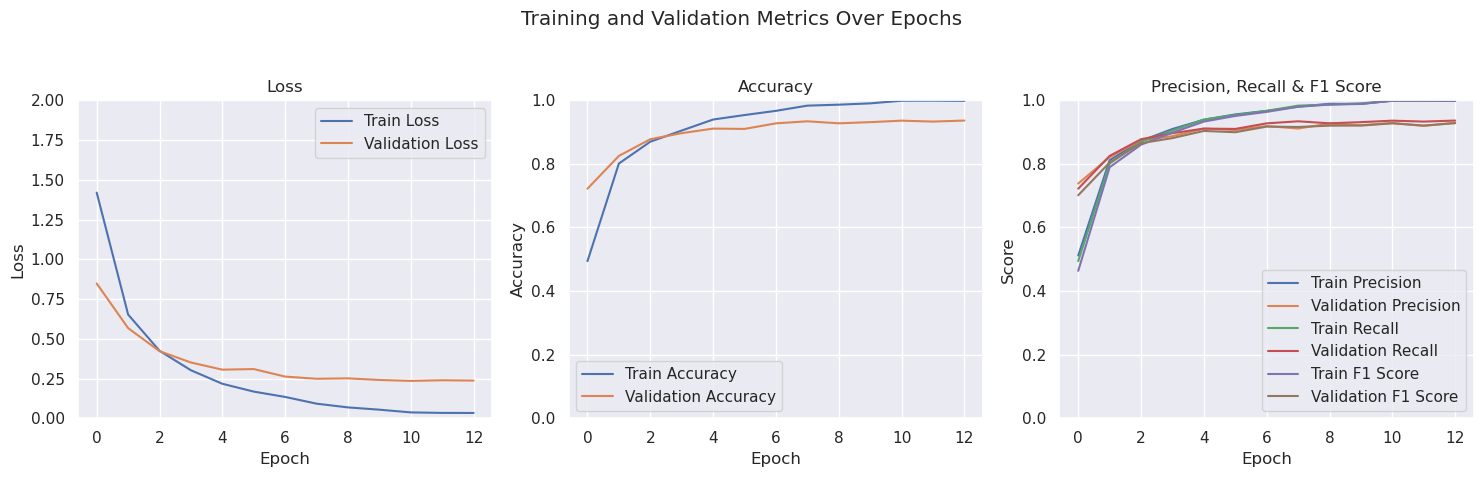

In [ ]:
from torchvision.transforms.functional import InterpolationMode

config = analysis.best_config

transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(
        brightness=analysis.best_config["brightness"],
        contrast=analysis.best_config["contrast"],
        saturation=analysis.best_config["saturation"]
    ),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=0, shear=analysis.best_config["shear"]),
    transforms.Resize(242, interpolation=transforms.InterpolationMode.BILINEAR),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
data_module = ConfigurableDataModule(
    train_data_dir=train_data_path,
    test_data_dir=our_test_data_path,
    batch_size=analysis.best_config["batch_size"],
    train_transform=transform,
    val_test_transform=transform # Nutzung der gleichen Transformationen
)
model = VitWasteClassifier(
    num_classes=9,
    learning_rate=analysis.best_config["learning_rate"]
)
callbacks = get_callbacks(
    model_checkpoint_path=model.models_dir,
    early_stop_patience=2
)
train_model(
    model,
    data_module,
    max_epochs=50,
    logger_name="ViT_B_16_best_config",
    version_name="ViT_B_16_best_config",
    callbacks=callbacks
)